# Pattern Recognition and Machine Learning 

<img src="https://images.gr-assets.com/books/1347401011l/55881.jpg" align="left" width="200" style="border:1px solid #CCC;">

<span class="ns">원제   : Pattern Recognition and Machine Learning </span>

<span class="ns">지은이 : 크리스토퍼 비숍 <sup>Christopher Bishop</sup></span>

<span class="ns">Springer</span>


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

style_name = 'bmh' #bmh

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

## 2장 확률분포 - 1편

<hr style="height:3px;border:none;color:#FF0000;background-color:#FF0000;"/>

### 연습문제 2.8
Consider two variables $x$ and $y$ with joint distribution $p(x,y)$. Prove the following two results

$$
\begin{align}
&\mathbb{E}[x] = \mathbb{E}_{y}\left[\mathbb{E}_{x}[x \mid y] \right] \\[5pt]
&Var[x] = \mathbb{E}_{y}\left[Var_{x}[x \mid y]\right] + Var_{y}[\mathbb{E}_{x}[x \mid y]]
\end{align}
$$

Here $\mathbb{E}_{x}[x \mid y]$ denotes the expectation of x under the conditional distribution $p(x \mid y)$, with a similar notation for the conditional variance.

<hr/>

**1번** : $\mathbb{E}[x \mid y] = \int_{x} p(x \mid y) \, x \, dx $ 이므로 

$$
\begin{align}
\mathbb{E}_{y}[\mathbb{E}_{x}[x \mid y]] 
&= \int_{y} p(y) \left\{ \int_{x} p(x \mid y) \, x \,  dx \right\} dy \\[5pt]
&= \int_{x} \int_{y} p(y) p(x \mid y) dy \, x \, dx \\[5pt]
&= \int_{x} p(x)  \, x \, dx = \mathbb{E}[x]
\end{align}
$$

이 식을 **Law of total expectation**이라 한다.


**2번** : 식의 우변의 첫째항 둘째항을 풀어 적으면

$$
\begin{align}
\mathbb{E}_{y}[Var_{x}[x \mid y]] 
&= \mathbb{E}_{y}[ \mathbb{E}_{x}[x^2 \mid y] - \left(\mathbb{E}_{x}[x \mid y]\right)^2 ] \\[5pt]
&= \mathbb{E}_{y}[ \mathbb{E}_{x}[x^2 \mid y]] - \mathbb{E}_{y}[ \left(\mathbb{E}_{x}[x \mid y]\right)^2 ] \\[5pt]
&= \mathbb{E}_{x}[x^2] - \mathbb{E}_{y}[\left(\mathbb{E}_{x}[x \mid y]\right)^2 ]  \qquad \because \mathbb{E}[x] = \mathbb{E}_{y}[\mathbb{E}_{x}[x \mid y]]
\end{align}
$$

$$
\begin{align}
Var_{y}[\mathbb{E}_{x}[x \mid y]] = \mathbb{E}_{y}[\left(\mathbb{E}_{x}[x \mid y]\right)^2 ] - \left( \mathbb{E}_{y}[ \mathbb{E}_{x}[x \mid y] ] \right)^2
\end{align}
$$

위 두 식을 더하면 

$$
\begin{align}
& \mathbb{E}_{y}[Var_{x}[x \mid y]] + Var_{y}[\mathbb{E}_{x}[x \mid y]] \\[5pt]
&= \mathbb{E}_{x}[x^2] - \mathbb{E}_{y}[\left(\mathbb{E}_{x}[x \mid y]\right)^2 ] +\mathbb{E}_{y}[\left(\mathbb{E}_{x}[x \mid y]\right)^2 ] - \left( \mathbb{E}_{y}[ \mathbb{E}_{x}[x \mid y] ] \right)^2 \\[5pt]
&= \mathbb{E}_{x}[x^2]- \left( \mathbb{E}_{y}[ \mathbb{E}_{x}[x \mid y] ] \right)^2 \\[5pt]
&=  \mathbb{E}_{x}[x^2] - \left(  \mathbb{E}_{x}[x]  \right)^2 \qquad \because \mathbb{E}[x] = \mathbb{E}_{y}[\mathbb{E}_{x}[x \mid y]] \\[5pt]
&= Var[x]
\end{align}
$$

이 식을 **Law of total variance** 라 한다.

### 식(2.32),(2.33) 유도
<hr/>

다항분포에 대한 가능도는 아래와 같고

$$
p(\mathcal{D} \mid \boldsymbol{\mu}) = \prod^{N}_{n=1} \prod^{K}_{k=1} \mu^{x_{nk}}_{k}  = \prod^{K}_{k=1} \mu_{k}^{(\sum_{n} x_{nk})}=\prod^{K}_{k=1} \mu_{k}^{m_{k}} 
$$

위 식에서 

$$
m_{k} = \sum_{n} x_{nk}
$$


이에 대한 최대가능도 추정<sup>maximum likelihood estimation</sup>에 의한 $\boldsymbol{\mu}^{\text{ML}}$을 구하기

$\mu_{k}$는 1-of-K 벡터의 각 k번째 콤포넌트가 1이 될 확률을 나타내므로 다 더해서 1이 되어야 함 즉,

$$ \sum_{k=1}^{K} \mu_{k} = 1 $$

이고 이는 제약 조건이 됨.

위에 정의한 가능도는 역시나 로그를 취해서 다루게 된다. 따라서 다음 최적화 문제를 풀어  $\boldsymbol{\mu}^{\text{ML}}$을 구할 수 있다.

$$
\text{Minimize  } \ln p(\mathcal{D} \mid \boldsymbol{\mu}) \quad \text{ s.t.  }  \sum_{k=1}^{K} \mu_{k} = 1
$$

라그랑지안을 구성하고,

$$
\mathcal{L}(\boldsymbol{\mu}, \lambda)  = \sum_{k=1}^{K} m_k \ln \mu_k + \lambda \left( \sum_{k=1}^{K} \mu_k -1 \right)
$$

각 변수 $\mu_k$, $\lambda$로 미분한 후 0으로 놓고 극점을 찾는다.

$$
\begin{align}
&\frac{\partial \mathcal{L}}{\partial \mu_k} = \frac{m_k}{\mu_k} + \lambda = 0 \\[5pt]
&\frac{\partial \mathcal{L}}{\partial \lambda} = \sum_{k=1}^{K} \mu_k -1 = 0
\end{align}
$$

첫번째 식을 정리하면 $ \mu_k = -m_{k} / \lambda $를 얻고 이를 두번째 식에 대입하면 

$$
\begin{align}
&\sum_{k=1}^{K} \left( - \frac{m_k}{\lambda} \right) = 1 \\[5pt]
&-\frac{1}{\lambda} \sum_{k=1}^{K} m_k = 1\\[5pt]
&-\frac{1}{\lambda} \sum_{k=1}^{K} \sum_{n=1}^{N} x_{nk} = 1
\end{align}
$$

위 식에서 $\sum_{k=1}^{K} \sum_{n=1}^{N} x_{nk} = N$ 이 되는데 왜냐하면 $N$개의 $K$차원 벡터 $\mathbf{x}$는 $k$번째 요소만 1이고 나머지는 모두 0인 벡터인데 이를 각 자리끼리 다 더해서 나온 벡터는 가지고 있는 데이터중에 $k$번째 자리가 1인 벡터가 몇 개인지를 나타냄. 이를 싹 다 더하는 거니까 결과는 $N$이 됨. 다음 코드로 간단하게 실험해 봄

In [2]:
import numpy as np
N = 10
K = 6
D = np.zeros((K,N))
D[np.random.randint(6,size=10),np.arange(10)] = 1
print("길이 K={}인 x벡터 N={}개".format(K, N))
print(D)
D.sum(axis=1).sum(axis=0)

길이 K=6인 x벡터 N=10개
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


10.0

결국 $\lambda = -N$이 되고 이 결과를 다시  $ \mu_k = -m_{k} / \lambda $ 대입하면 최종적으로

$$
\mu^{\text{ML}}_k = - \frac{m_k}{N}
$$

### 연습문제 2.17

 Consider the multivariate Gaussian distribution given by (2.43). By writing the precision matrix (inverse covariance matrix) $\Sigma^{-1}$ as the sum of a symmetric and an anti-symmetric matrix, show that the anti-symmetric term does not appear in the exponent of the Gaussian, and hence that the precision matrix may be taken to be symmetric without loss of generality. Because the inverse of a symmetric matrix is also symmetric (see Exercise 2.22), it follows that the covariance matrix may also be chosen to be symmetric without loss of generality.
<hr/>

다변수 정규분포의 지수항에 들어있는 정밀도 행렬에 어떤 행렬이라도 올 수 있는데 어떤 행렬이 오더라도 지수항의 결과가 동일해지는 대칭행렬로 바꿀 수 있다. 
$\mathbf{M}$이 일반적인 정방행렬이라 하면 이것은 항상 다음과 같이 대칭행렬과 반대칭행렬<sup>skew symmetric, anti symmetric</sup>로 분리할 수 있다.<sup>[1]</sup>

$$
\mathbf{M} = \mathbf{\Lambda}^{S} + \mathbf{\Lambda}^{A}
$$

이때 
$$
\Lambda^{S}_{ij} = \frac{M_{ij}+M_{ji}}{2},  \qquad  
\Lambda^{A}_{ij} = \frac{M_{ij}-M_{ji}}{2}
$$

문제에서 보이고자 하는 것은 임의의 행렬 $\mathbf{M}$을 정규분포 지수항에 넣어 계산한 결과와 $\mathbf{\Lambda}^{S}$를 넣어 계산한 결과가 같다는 것을 보이는 것이다. 아래 코드로 일단 실험해본다.

In [3]:
# 임의의 5x5 행렬
M = np.random.randint(1,30, size=25).reshape(5,5)
print('원래 행렬 M')
print(M)
print('\n')

# 대칭행렬
print('대칭 행렬 S')
S = (M + M.T)/2
print(S)
print('\n')

#반대칭행렬
print('반대칭 행렬 A')
A = (M - M.T)/2
print(A)
print('\n')

#둘을 더하면 원래 행렬이 된다.
print('M = S+A')
print(S+A)
print('\n')

# 정규분포 지수항을 계산해본다. (x-u)^T Σ^-1 (x-u)  , (x-u)^T (S) (x-u) 비교
# 결과가 같다.
x = np.random.randint(1, 30, size=5)
u = np.random.randint(1, 30, size=5)
print('(x-u)^T M (x-u) : {}'.format(np.dot(np.dot((x - u).T, M), (x-u))))
print('(x-u)^T S (x-u) : {}'.format(np.dot(np.dot((x - u).T, S), (x-u))))


원래 행렬 M
[[28 13  1 11  3]
 [ 6  2  1 15 24]
 [14 24 22 15 25]
 [17 23  1 11  5]
 [ 4 26 25 28  2]]


대칭 행렬 S
[[ 28.    9.5   7.5  14.    3.5]
 [  9.5   2.   12.5  19.   25. ]
 [  7.5  12.5  22.    8.   25. ]
 [ 14.   19.    8.   11.   16.5]
 [  3.5  25.   25.   16.5   2. ]]


반대칭 행렬 A
[[  0.    3.5  -6.5  -3.   -0.5]
 [ -3.5   0.  -11.5  -4.   -1. ]
 [  6.5  11.5   0.    7.    0. ]
 [  3.    4.   -7.    0.  -11.5]
 [  0.5   1.    0.   11.5   0. ]]


M = S+A
[[ 28.  13.   1.  11.   3.]
 [  6.   2.   1.  15.  24.]
 [ 14.  24.  22.  15.  25.]
 [ 17.  23.   1.  11.   5.]
 [  4.  26.  25.  28.   2.]]


(x-u)^T M (x-u) : 1680
(x-u)^T S (x-u) : 1680.0


위와 같이 되는 이유는 다음과 같다.

$$
\begin{align}
\sum_{i} \sum_{j} (x_{i}-\mu_{i}) M_{ij} (x_{j} -\mu_{j}) 
&=  \sum_{i} \sum_{j} (x_{i}-\mu_{i}) (\Lambda^{S}_{ij} + \Lambda^{A}_{ij}) (x_{j} -\mu_{j}) \\[5pt]
&= \sum_{j} \left( \sum_{i} (x_{i}-\mu_{i}) \Lambda^{S}_{ij} + \sum_{i} (x_{i}-\mu_{i}) \Lambda^{A}_{ij} \right)  (x_{j} -\mu_{j}) \\[5pt]
&= \sum_{i} \sum_{j} (x_{i}-\mu_{i}) \Lambda^{S}_{ij} (x_{j} -\mu_{j}) + \underbrace{\sum_{i} \sum_{j} (x_{i}-\mu_{i}) \Lambda^{A}_{ij} (x_{j} -\mu_{j})}_{= 0}
\end{align}
$$

위 식처럼 $\mathbf{M}$을 대칭행렬 $\mathbf{\Lambda}^{S}$와 반대칭행렬 $\mathbf{\Lambda}^{A}$로 바꾸고 식을 전개하면 $\mathbf{\Lambda}^{A}$에 의한 항은 0이 된다. $\mathbf{\Lambda}^{A}$에서 $i=j$인 경우 행렬의 요소는 이미 0이고 $i \ne j$인 경우는 요소의 부호가 서로 반대가 되어 더하면 다 사라지기 때문이다. 

 정규분포의 지수항에 들어가는 정밀도 행렬은 공분산 행렬의 역행렬인데 공분산 행렬이 대칭행렬이기 때문에 정밀도 행렬도 대칭행렬일 수 밖에 없다. 위 증명을 통해 이야기하고 싶은 사실은 **정밀도 행렬이 대칭행렬이라는 사실이 정규분포의 일반성을 제한하지 않는다는 것이다.** 정밀도행렬 위치에 일반적으로 존재할 수 있는 모든 정방행렬이 오는 경우를 그에 대응하는 대칭행렬로 바꿔서도 모두 만들어 낼 수 있기 때문이다.
 
#### 참고문헌
1. 대칭, 반대칭, 직교행렬, 공업수학 10판 8.3절 

### 연습문제 2.19 - 식(2.48),(2.49)
 Show that a real, symmetric matrix $\Sigma$ having the eigenvector equation (2.45) can be expressed as an expansion in the eigenvectors, with coefficients given by the eigenvalues, of the form (2.48). Similarly, show that the inverse matrix $\Sigma^{-1}$ has a representation of the form (2.49).
<hr/>

문제에서 참조하는 식은 다음과 같다.

$$
\boldsymbol{\Sigma} \mathbf{u}_{i} = \lambda_{i} \mathbf{u}_{i} \tag{2.45}
$$

$$
\boldsymbol{\Sigma} = \sum_{i=1}^{D} \lambda_{i} \mathbf{u}_{i} \mathbf{u}^{\text{T}}_{i} \tag{2.48}
$$

$$
\boldsymbol{\Sigma}^{-1} = \sum_{i=1}^{D} \frac{1}{\lambda_{i}} \mathbf{u}_{i} \mathbf{u}^{\text{T}}_{i} \tag{2.49}
$$

먼저 식(2.48)에 있는 열벡터와 행백터를 행렬곱해서 행렬이 되고 이를 다 더하는 연산을 행렬형식으로 쓰는 경우를 알아보자.
$\mathbf{u}_{i} \mathbf{u}^{\text{T}}_{i}$가 행렬이 되고 $i$에 대해 그렇게 생긴 행렬을 다 더하는 연산이니까 이 행렬 더하기를 한번에 하기 위해서는 앞의 열벡터를 가로 방향으로 적어서 행렬로 만들고 뒤에 행벡터를 세로 방향으로 적어서 앞 행렬의 전치행렬로 만들어 행렬곱을 하면 한번에 식(2.48)을 계산할 수 있다. 이때 앞에 상수 $\lambda_{i}$가 곱해지기 때문에 이 상수도 행렬로 표현해주어야 한다. $\lambda_{i}$를 요소로 표현해서 식(2.48)을 행렬형식으로 쓰면 아래와 같다.

$$
\begin{bmatrix}
\lambda_{1} \mathbf{u}_{1} & \lambda_{2} \mathbf{u}_{2} & \cdots & \lambda_{D} \mathbf{u}_{D}
\end{bmatrix}
\begin{bmatrix}
 \mathbf{u}_{1}^{\text{T}} & \mathbf{u}_{2}^{\text{T}} & \cdots & \mathbf{u}_{D}^{\text{T}}
\end{bmatrix}
$$

행렬의 각 열에 특정 상수를 곱하는 것은 그 상수를 주대각 요소를 가지는 행렬을 뒤에서 곱하면 되므로 위 식을 다음과 같이 쓸 수 있다.

$$
\begin{bmatrix}
\mathbf{u}_{1} & \mathbf{u}_{2} & \cdots & \mathbf{u}_{D}
\end{bmatrix}
\begin{bmatrix}
\lambda_{1} & 0           & \cdots & 0 \\
0           & \lambda_{2} & \cdots & 0 \\
            &             & \ddots &   \\
0           & 0           & \cdots & \lambda_{D}            
\end{bmatrix}
\begin{bmatrix}
 \mathbf{u}_{1}^{\text{T}} & \mathbf{u}_{2}^{\text{T}} & \cdots & \mathbf{u}_{D}^{\text{T}}
\end{bmatrix}
$$

orthonormal한 고유벡터를 열로 가지는 행렬을 

$$ \mathbf{U} = \begin{bmatrix}
\mathbf{u}_{1} & \mathbf{u}_{2} & \cdots & \mathbf{u}_{D}
\end{bmatrix}$$

로 두면 식(2.48)은 다음처럼 완전히 행렬로 쓸 수 있다.

$$
\sum_{i=1}^{D} \lambda_{i} \mathbf{u}_{i} \mathbf{u}^{\text{T}}_{i} = \mathbf{U} \mathbf{\Lambda} \mathbf{U}^{\text{T}} = \mathbf{M} \tag{1}
$$

같은 논리로 식(2.45)는 다음처럼 쓸 수 있다.

$$
\boldsymbol{\Sigma} \mathbf{U} = \mathbf{U} \mathbf{\Lambda} \tag{2}
$$

이제 식(1)의 양변에 $ \mathbf{U}^{\text{T}}$, $\mathbf{U}$를 곱하면

$$
\mathbf{U}^{\text{T}}  \mathbf{M} \mathbf{U} = \mathbf{U}^{\text{T}} \mathbf{U} \mathbf{\Lambda} \mathbf{U}^{\text{T}} \mathbf{U} =  \mathbf{\Lambda} \qquad \because \mathbf{U}^{\text{T}} \mathbf{U} = \mathbf{I}
$$

그리고 식(2) 양변에 $ \mathbf{U}^{\text{T}}$를 곱하면

$$
\mathbf{U}^{\text{T}} \boldsymbol{\Sigma} \mathbf{U} = \mathbf{U}^{\text{T}} \mathbf{U} \mathbf{\Lambda} = \mathbf{\Lambda}
$$

따라서 $\mathbf{U}^{\text{T}}  \mathbf{M} \mathbf{U} = \mathbf{U}^{\text{T}} \boldsymbol{\Sigma} \mathbf{U}$이고 이로부터 $\mathbf{M}=\boldsymbol{\Sigma}$가 되며 최종적으로 식(1)에 의해 다음처럼 식(2.48)이 성립하게 된다.

$$
\boldsymbol{\Sigma} = \sum_{i=1}^{D} \lambda_{i} \mathbf{u}_{i} \mathbf{u}^{\text{T}}_{i}
$$

한편 $\boldsymbol{\Sigma} = \mathbf{U} \mathbf{\Lambda} \mathbf{U}^{\text{T}}$ 이고, $\mathbf{U}$는 $\mathbf{U}^{\text{T}} = \mathbf{U}^{-1}$를 만족하는 직교행렬이므로 

$$
\boldsymbol{\Sigma}^{-1} = \left( \mathbf{U} \mathbf{\Lambda} \mathbf{U}^{\text{T}} \right) ^{-1} = \left( \mathbf{U}^{\text{T}} \right)^{-1} \mathbf{\Lambda}^{-1} \mathbf{U}^{-1} =   \left( \mathbf{U}^{-1} \right)^{-1} \mathbf{\Lambda}^{-1} \mathbf{U}^{\text{T}} = \mathbf{U} \mathbf{\Lambda}^{-1} \mathbf{U}^{\text{T}}  = \sum_{i=1}^{D} \frac{1}{\lambda_{i}} \mathbf{u}_{i} \mathbf{u}^{\text{T}}_{i}
$$

로 식(2.49)도 성립함을 보일 수 있다.

### 식(2.51)
<hr/>

다음 식(2.51)의 기하학적 의미는

$$
y_i = \mathbf{u}_{i}^{\text{T}} (\mathbf{x}-\boldsymbol{\mu}) \tag{2.51}
$$

<img src="./eq2.51.png" width="400">

그림처럼 $\mathbf{x}-\boldsymbol{\mu}$가 기저벡터 $\mathbf{u}_{i}$방향으로 분해된 벡터의 크기를 나타낸다. 즉, $\mathbf{x}-\boldsymbol{\mu}$의 $\mathbf{u}_{i}$로의 정사영이며 이는 두 벡터의 내적과 같다.

### Figure 2.7 
<hr/>


<img src="./Figure2.7.png" width="450">
>The red curve shows the elliptical surface of constant probability density for a Gaussian in a two-dimensional space $x =(x_1 ,x_2 )$ on which the densityis $\exp(−1/2)$ of its value at $x = \mu$. The axes of the ellipse are defined by the eigenvectors $u_i$ of the covariance matrix, with corresponding eigenvalues $\lambda_i$. - PRML:Fig.2.7

위 그림 설명글에서 "$\exp(−1/2)$ of its value at $x = \mu$" 부분이 좀 애매하게 해석될 수 도 있어 추가 설명을 정리한다.

그림에서 빨간색 라인은 2변수 정규분포 확률밀도함수 값이 

$$
\frac{1}{(2\pi)^{D/2}} \frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \exp \left\{- \frac{1}{2} \right\}
$$

인 라인이다. 다변수 정규분포에서 $x = \mu$이면 지수항은 1이 되어 그때의 함수값은 $\frac{1}{(2\pi)^{D/2}} \frac{1}{|\boldsymbol{\Sigma}|^{1/2}}$이 되므로 빨간 라인이 이 값의 $\exp(−1/2)$만큼(* which the densityis $\exp(−1/2)$ of its value at $x = \mu$ *)이라고 말한 것이다. 타원의 장축과 단축의 길이가 $\sqrt{\lambda}$인 것은 다음과 같다.

$$
\frac{1}{(2\pi)^{D/2}} \frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \exp \left\{- \frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\text{T}} \Sigma^{-1} (\mathbf{x}-\boldsymbol{\mu}) \right\} =  \frac{1}{(2\pi)^{D/2}} \frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \exp \left\{ - \frac{1}{2} \right\}
$$

빨간 선위의 모든 점들은 위 식을 만족시켜야 한다. 식(2.50)을 써서 식을 변형하면

$$
\frac{1}{(2\pi)^{D/2}} \frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \exp \left\{ \sum_{i=1}^{D} - \frac{y_{i}^{2}}{2 \lambda_i}\right\} =  \frac{1}{(2\pi)^{D/2}} \frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \exp \left\{ - \frac{1}{2} \right\}
$$

이고, 그림의 경우 $D=2$이므로

$$
\frac{1}{(2\pi)^{D/2}} \frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \exp \left\{ -\frac{1}{2} \left( \frac{y_1^2}{\lambda_1} + \frac{y_2^2}{\lambda_2} \right) \right\} =  \frac{1}{(2\pi)^{D/2}} \frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \exp \left\{ - \frac{1}{2}(1) \right\}
$$

가 되고 빨간선 위의 $y_1$, $y_2$는 다음을 만족시키는 점들이 된다.

$$
\frac{y_1^2}{\lambda_1} + \frac{y_2^2}{\lambda_2} = 1
$$

위 식을 만족시키는 $y_1$, $y_2$의 집합은 타원이 되며 그때 타원의 장축과 단축은 $\sqrt{\lambda_1}$, $\sqrt{\lambda_2}$가 되는 것을 알 수 있다.

### 식(2.55) 
<hr/>

$$
\mid \boldsymbol{\Sigma} \mid^{1/2} = \prod^{D}_{j=1} \lambda_{j}^{1/2}
$$

위 식의 의미는 $\boldsymbol{\Sigma}$ 행렬의 행렬식은 고유값의 곱이라는 것인데 이는 다음과 같이 보일 수 있다.

우선 고유치 분해를 통해 행렬 $\boldsymbol{\Sigma}$는 다음처럼 분해 가능하다.<sup>[1][2]</sup>

$$
\Sigma = \mathbf{X}\mathbf{\Lambda}\mathbf{X}^{-1}
$$

여기서 $\mathbf{\Lambda}$는 고유값을 주대각요소로 가지는 대각행렬이고, $\mathbf{X}$는 행렬 $\Sigma$의 고유벡터를 열로 가지는 행렬이다.

이 상태에서 행렬식을 구하면

$$
\det \left(\boldsymbol{\Sigma} \right) = \det \left(\mathbf{X}\mathbf{\Lambda}\mathbf{X}^{-1}\right) = \det \left(\mathbf{X}\right)\det \left(\mathbf{\Lambda} \right) \det \left( \mathbf{X}^{-1} \right)
$$

와 같다. 여기서 $\det \left(\mathbf{X} \right)$와 $\det \left(\mathbf{X}^{-1} \right)$ 다음처럼 역수 관계이므로

$$
\det \left(\mathbf{I} \right) = \det \left(\mathbf{X}\mathbf{X}^{-1} \right) = \det \left(\mathbf{X}\right)\det\left(\mathbf{X}^{-1}\right) = 1
$$

다음이 성립한다.

$$
\det \left(\boldsymbol{\Sigma}\right) = \det\left(\mathbf{\Lambda}\right)
$$

여기서 $\mathbf{\Lambda}$는 고유값을 주대각요소로 가지는 대각행렬이므로 $\det(\mathbf{\Lambda})$는 고유값의 곱이 된다.
마지막으로 양변을 1/2승 하면

$$
\left\{\det (\boldsymbol{\Sigma}) \right\}^{1/2} = \left\{\det(\mathbf{\Lambda})\right\}^{1/2} = \left\{\prod_{i} \lambda_{i} \right\}^{1/2} = \prod_{i} \lambda_{i}^{1/2}
$$

#### 참고문헌

1. 고유치분해 https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix
2. 행렬의 대각화, 공업수학 10판 8장 정리4

### 식(2.58), (2.59)
<hr/>


$$
\begin{align}
\mathbb{E}[\mathbf{x}] &= \frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}}\int \exp \left\{ -\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu})^{\text{T}} \boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu}) \right\} \mathbf{x}\, \text{d}\mathbf{x} \\[5pt]
&= \frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}}\int \exp \left\{ -\frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} (\mathbf{z}+\boldsymbol{\mu}) \text{d} \mathbf{z}
\end{align} \tag{2.58}
$$

$$
\mathbb{E}[\mathbf{x}] = \boldsymbol{\mu} \tag{2.59}
$$

식(2.58)의 적분이 왜 식(2.59)가 되는지 설명한다. 식(2.58)은 다변수 정규분포에 $\mathbf{x}$를 곱해서 적분한 것으로 다변수 정규분포의 정규화 성질에 의해 

$$
{(2 \pi)^{D/2}}{|\Sigma|^{1/2}} = \int \exp \left\{ -\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu})^{\text{T}} \boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu}) \right\} \text{d}\mathbf{x} \tag{1}
$$

임을 알고 있다. 식(2.58)을 더 전개하면

$$
\mathbb{E}[\mathbf{x}] = \frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \int \exp \left\{ -\frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} \mathbf{z} \, d \mathbf{z} +  \frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \boldsymbol{\mu} \int \exp \left\{ -\frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} \text{d} \mathbf{z}
$$

인데 둘째항에서 $\boldsymbol{\mu}$를 제외한 부분은 식(1)에 의해 

$$
\frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \int \exp \left\{ -\frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\}  \text{d} \mathbf{z} =1
$$

이 되어 둘째항은 $\boldsymbol{\mu}$ 가 된다. 적분부분은 $\mathbf{x} = \mathbf{z}+\boldsymbol{\mu}$로 상수만큼 더해진 변수변환된 적분이므로 식(1)과 적분값은 동일하다.

첫째항은 $\exp(-\text{quadratic formula})$은 짝함수<sup>even function</sup>가 되는데 여기에 다시 $\mathbf{z}$가 곱해져 있는 형태로 홀함수가 되어 적분이 0이 되어 사라진다. 그래서 식(2.59)를 얻게 된다.  

아래 코드로 짝함수에 변수가 한번 곱해졌을 때 그래프를 그려보았다. 

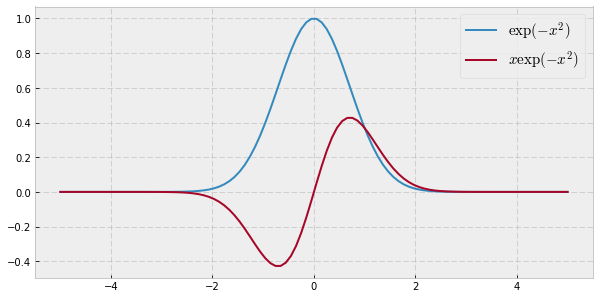

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.integrate as integrate

mpl.style.use(style_name)
plt.rcParams["figure.figsize"] = (10,5)

x = np.linspace(-5, 5, 100)

# exp(-quadratic) is even function
f =  np.exp(-x**2)

# even function * variable is odd function
fx = f*x

plt.plot(x, f, label=r"$\exp(-x^2)$")
plt.plot(x, fx, label=r"$x\exp(-x^2)$")
plt.legend(fontsize="15")
plt.show()

### 식 (2.60)~(2.64)
<hr/>

식(2.60)~(2.64)까지는 좀 전개가 복잡한 면이 있어서 책에서도 계산 과정은 다 생략해버리고 계산하는 방식만 간단하게 언급하고 있다. 5개식의 전개과정을 자세히 정리하였다.

5개의 식은 아래 식을 계산하기 위한 과정인데 아래식은 확률변수 $\mathbf{x}$ 제곱의 기대값을 구하기 위한 것이다.

$$
\begin{align}
\mathbb{E}[\mathbf{x}\mathbf{x}^{\text{T}}] 
&= \frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \int \exp \left\{ - \frac{1}{2} (\mathbf{x}-\boldsymbol{\mu})^{\text{T}} \boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu}) \right\} \mathbf{x}\mathbf{x}^{\text{T}} \text{d}\mathbf{x} \\[5pt]
&= \frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} (\mathbf{z}+\boldsymbol{\mu})(\mathbf{z}+\boldsymbol{\mu})^{\text{T}}\text{d}\mathbf{z}
\end{align}
$$

$(\mathbf{z}+\boldsymbol{\mu})(\mathbf{z}+\boldsymbol{\mu})^{\text{T}}$ 부분을 전개하면 $\mathbf{z}\mathbf{z}^{\text{T}} +\mathbf{z} \boldsymbol{\mu}^{\text{T}}+\boldsymbol{\mu}\mathbf{z}^{\text{T}}+ \boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}}$가 되고 위식을 한번 더 전개하면 다음과 같다.

$$
\begin{align}
&\quad \frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} (\mathbf{z}+\boldsymbol{\mu})(\mathbf{z}+\boldsymbol{\mu})^{\text{T}}\text{d}\mathbf{z} \\[5pt]
&=\frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} (\mathbf{z}\mathbf{z}^{\text{T}} +\mathbf{z} \boldsymbol{\mu}^{\text{T}}+\boldsymbol{\mu}\mathbf{z}^{\text{T}}+ \boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}})\text{d}\mathbf{z}\\[5pt]
&=\frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}}\left[ 
\int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} \mathbf{z}\mathbf{z}^{\text{T}} \text{d}\mathbf{z} + \int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} \mathbf{z} \boldsymbol{\mu}^{\text{T}} \text{d}\mathbf{z} + \\ 
\int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} \boldsymbol{\mu}\mathbf{z}^{\text{T}} \text{d}\mathbf{z} + \int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\}\boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}} \text{d}\mathbf{z} \right] 
\end{align}
$$

적분항의 가운데 두항은 식(2.59)를 유도할 때와 마찬가지로 우함수가 되어 적분이 0 이 되어 사라진다. 두 항만 남기고 전개하면

$$
\begin{align}
\mathbb{E}[\mathbf{x}\mathbf{x}^{\text{T}}] &= \frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}}\left[ 
\int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} \mathbf{z}\mathbf{z}^{\text{T}} \text{d}\mathbf{z} +  \int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\}\boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}} \text{d}\mathbf{z} \right] \\[5pt]
&=\frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} \mathbf{z}\mathbf{z}^{\text{T}} \text{d}\mathbf{z} + \frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\}\boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}} \text{d}\mathbf{z}
\end{align}
$$

이 되는데 두번째 적분에서 $\boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}}$는 적분과 상관없는 상수라 적분밖으로 빠져나오면 

$$
 \boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}} \frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} \text{d}\mathbf{z}
$$

이 되는데, 여기서 $\boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}}$를 제외한 부분은 $\mathbf{z}$에 대한 정규분포의 지수항 부분을 적분하여 정규화 상수 역수에 곱해주는 것이기 때문에 1이 된다. 따라서 두번째 적분은  $\boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}}$가 되어 첫번째 적분만 처리하면 된다. 이 적분을 계산하는 것이 식(2.61)인데 자세한 설명없이 대충 말로 때우기 때문에 좀 더 자세히 적어본다.

$\boldsymbol{\Sigma}$의 고유벡터 $\mathbf{u}_i$는 직교단위벡터<sup>orthonormal</sup>이므로 기저를 이루어 임의의 벡터 $\mathbf{z}$를 다음처럼 고유벡터의 선형조합으로 쓸 수 있다. PRML에서 이를 고유벡터의 완전성<sup> the completeness of the set of eigenvectors</sup>이라 한다.

$$
\mathbf{z} = \sum_{j=1}^{D} y_j \mathbf{u}_j \tag{2.60}
$$

식(2.60)에서 선형조합 계수 $y_i$는 위 식(2.51) 설명처럼 각 고유벡터 방향으로의 정사영이므로 $y_j = \mathbf{u}_j^{\text{T}} \mathbf{z}$ 이다. $\mathbf{z}=\mathbf{x}-\boldsymbol{\mu}$이므로 이는 식(2.51)과 같은 결과이다. $\Sigma$가 고유벡터와 고유치의 곱<sup>the eigenvector expansion of the covariance matrix</sup>으로 나타내어지는 식(2.49), (2.50)과 식(2.60)을 사용하여 위 첫번째 적분식을 다시 써보면 다음과 같다.

$$
\begin{align}
&\frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} \mathbf{z}\mathbf{z}^{\text{T}} \text{d}\mathbf{z} \\[5pt]
&= \frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}}  \int \exp \left\{ -\sum_{k=1}^{D} \frac{y^2_k}{2 \lambda_k} \right\}\left(  \sum_{i=1}^{D} y_i \mathbf{u}_i\right) \left( \sum_{j=1}^{D} y_j \mathbf{u}_j \right)^{\text{T}}
\end{align}
$$

식 뒤쪽 시그마항 두개가 서로 곱해지는 부분은 벡터가 있더라도 

$$\sum_{i=1}^{2} x_i \sum_{j=1}^{2} x_j = (x_1+x_2)(x_1+x_2)=x_1 x_1+x_1 x_2+ x_2 x_1+x_2 x_2 =  \sum_i \sum_j x_i x_j$$

와 다른게 없으므로 그대로 전개해주면

$$
\frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}}  \int \exp \left\{ -\sum_{k=1}^{D} \frac{y^2_k}{2 \lambda_k} \right\} \sum_{i=1}^{D} \sum_{j=1}^{D} y_i \, y_j \, \mathbf{u}_i \, \mathbf{u}_j^{\text{T}} \text{d}\mathbf{y}
$$

가 되고 지수항 부분은 서메이션 인덱스에 대해 상수이므로 시그마 기호 안으로 들어가면

$$
\frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}}  \int  \sum_{i=1}^{D} \sum_{j=1}^{D} \exp \left\{ -\sum_{k=1}^{D} \frac{y^2_k}{2 \lambda_k} \right\} y_i \, y_j \, \mathbf{u}_i \, \mathbf{u}_j^{\text{T}} \text{d}\mathbf{y}
$$

가 된다. 적분기호안에 $i \times j$개 만큼의 항이 더해져 있으므로 각 항을 적분하여 더해도 된다. 그래서 시그마 기호를 적분 밖으로 빼낼 수 있고 동시에 $ \mathbf{u}_i \, \mathbf{u}_j^{\text{T}}$도 적분에 대해 상수이므로 같이 빠져 나오면 최종적으로 아래처럼 정리된다.

$$
\begin{align}
&\frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\boldsymbol{\Sigma}}^{-1} \mathbf{z} \right\} \mathbf{z}\mathbf{z}^{\text{T}} \text{d}\mathbf{z} \\[5pt]
&=\frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}}  \sum_{i=1}^{D} \sum_{j=1}^{D} \mathbf{u}_i \, \mathbf{u}_j^{\text{T}}  \int  \exp \left\{ -\sum_{k=1}^{D} \frac{y^2_k}{2 \lambda_k} \right\} y_i \, y_j \,  \text{d}\mathbf{y}
\end{align}
$$

위 식은 적분변수를 $\mathbf{z}$에서 $\mathbf{y}$로 바꾼 것이다. 그리고 식(2.54)에 의해 적분변수를 $\mathbf{x}$에서 $\mathbf{y}$로 바꿀때 야코비안 행렬식이 1이 됨을 보였다. $\mathbf{z}=\mathbf{x}-\boldsymbol{\mu}$로 $\mathbf{z}$와 $\mathbf{x}$는 상수 $\boldsymbol{\mu}$만큼 차이나는 관계이므로 $\mathbf{z}$에서 $\mathbf{y}$로 변수변환할 때 야코비안 행렬식도 역시 1이다. 그러므로 위 식 그대로 변수변환이 완료된 식이 된다. 위 식은 시그마 기호에의해 $i \times j$개 만큼 적분항이 있는데 $i = j$인 $D$개 경우를 제외하면 적분항이 0으로 다 사라진다. 여기서도 우함수 특성이 사용되는 것이다. $i \ne j$이고 지수항 안에 $k$와 $i$ 또는 $j$가 같은 경우 그 같은 인덱스에 대한 변수 $y_i$ 또는 $y_j$에 대한 적분은 우함수 적분이 되어 적분값이 0이 되는 것이다. 따라서 적분이 0이 아닌 항만 남기고 앞에서 확인한 식(2.55)를 이용해서 다시 쓰면

$$
\begin{align}
&\prod_{k=1}^{D}\frac{1}{(2\pi)^{1/2}}\prod_{k=1}^{D}\frac{1}{\lambda_{k}^{1/2}}  \sum_{i=1}^{D} \mathbf{u}_i \, \mathbf{u}_i^{\text{T}}  \int  \exp \left\{ -\sum_{k=1}^{D} \frac{y^2_k}{2 \lambda_k} \right\} y_i \, y_i \,  \text{d}\mathbf{y} \\[5pt]
&= \sum_{i=1}^{D} \mathbf{u}_i \, \mathbf{u}_i^{\text{T}}  \int  \prod_{k=1}^{D} 
\underbrace{\frac{1}{(2\pi \lambda_k)^{1/2}} \exp \left\{ - \frac{y_k^2}{2\lambda_k} \right\}}_{\text{Gaussian}, \mathcal{N}(y_k \mid 0, \lambda_k)} y^2_i \text{d}\mathbf{y}
\end{align}
$$

이 된다. 위 적분은 $y_1$~$y_D$에 대한 중적분이고 피적분함수안에 각 변수에 대한 1변수 정규분포 확률밀도함수 $D$개가 곱해져있는 형태이다. 좀 풀어서 적어보면 다음처럼 될 것이다.

$$
\begin{align}
&\mathbf{u}_1 \mathbf{u}_1^{\text{T}} \int \mathcal{N}(y_1 \mid 0, \lambda_1) \mathcal{N}(y_2 \mid 0, \lambda_2) \cdots \mathcal{N}(y_D \mid 0, \lambda_D) \, y_1^2 \, \text{d}\mathbf{y} \\[5pt]+&\mathbf{u}_2 \mathbf{u}_2^{\text{T}} \int \mathcal{N}(y_1 \mid 0, \lambda_1) \mathcal{N}(y_2 \mid 0, \lambda_2) \cdots \mathcal{N}(y_D \mid 0, \lambda_D) \, y_2^2 \, \text{d}\mathbf{y} \\[5pt]+&\cdots \\[5pt]+&\mathbf{u}_D \mathbf{u}_D^{\text{T}} \int \mathcal{N}(y_1 \mid 0, \lambda_1) \mathcal{N}(y_2 \mid 0, \lambda_2) \cdots \mathcal{N}(y_D \mid 0, \lambda_D) \, y_D^2 \, \text{d}\mathbf{y}
\end{align}
$$

푸비니 정리에 의해 한변수씩 차례로 적분을 하면 $k \ne i$인 경우는 식(2.57)에 의해 모두 적분이 1이 되고 $k = i$인 경우만 남게 된다.

$$
\sum_{i=1}^{D} \mathbf{u}_i \, \mathbf{u}_i^{\text{T}}  
\underbrace{\int \frac{1}{(2\pi \lambda_i)^{1/2}} \exp \left\{ - \frac{y_i^2}{2\lambda_i} \right\} \, y^2_i \, \text{d}y_i}_{\lambda_i}
$$

남아 있는 적분은 식(1.50)에 의해 $\lambda_i$가 되고 식(2.48)에 의해 최종적으로 다음처럼 식(2.61)이 완성된다.

$$
\frac{1}{(2 \pi)^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}} \int \exp \left\{ - \frac{1}{2} \mathbf{z}^{\text{T}} \boldsymbol{\Sigma}^{-1} \mathbf{z} \right\} \mathbf{z}\mathbf{z}^{\text{T}} \text{d}\mathbf{z} = \sum_{i=1}^{D} \mathbf{u}_i \, \mathbf{u}_i^{\text{T}} \lambda_i = \boldsymbol{\Sigma} \tag{2.61}
$$

처음 계산하고자 했던 확률변수 $\mathbf{x}$ 제곱의 기대값은

$$
\mathbb{E} \left[\mathbf{x} \mathbf{x}^{\text{T}}\right] = \boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}} + \Sigma \tag{2.62}
$$

이 된다. 한편 분산은 편차평균의 제곱이므로 벡터변수에 대해서도 같이 적용해보면

$$
\text{cov}[\mathbf{x}] = \mathbb{E}[ (\mathbf{x}-\mathbb{E}[\mathbf{x}])(\mathbf{x}-\mathbb{E}[\mathbf{x}])^{\text{T}}  ] \tag{2.63}
$$

식(2.63)을 식(2.62)를 이용하여 계속 전개하면

$$
\begin{align}
\text{cov}[\mathbf{x}] &= \mathbb{E} \left[ (\mathbf{x}-\mathbb{E}[\mathbf{x}])(\mathbf{x}-\mathbb{E}[\mathbf{x}])^{\text{T}}  \right] \\[5pt]
&= \mathbb{E} \left[\mathbf{x}\mathbf{x}^{\text{T}} - \mathbf{x}\mathbb{E}[\mathbf{x}]^{\text{T}} - \mathbb{E}[\mathbf{x} ]\mathbf{x}^{\text{T}} + \mathbb{E}[\mathbf{x}]\mathbb{E}[\mathbf{x}]^{\text{T}}  \right] \\[5pt]
&= \mathbb{E} \left[ \mathbf{x}\mathbf{x}^{\text{T}} - \mathbf{x}\boldsymbol{\mu}^{\text{T}} - \boldsymbol{\mu}\mathbf{x}^{\text{T}} + \boldsymbol{\mu} \boldsymbol{\mu}^{\text{T}}  \right] \\[5pt]
&= \mathbb{E} \left[ \mathbf{x}\mathbf{x}^{\text{T}} \right] - \mathbb{E}\left[\mathbf{x}\boldsymbol{\mu}^{\text{T}}\right] - \mathbb{E}\left[ \boldsymbol{\mu}\mathbf{x}^{\text{T}}\right] + \mathbb{E}\left[ \boldsymbol{\mu} \boldsymbol{\mu}^{\text{T}} \right] \\[5pt]
&= \boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}} + \Sigma - \boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}} - \boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}} + \boldsymbol{\mu}\boldsymbol{\mu}^{\text{T}} \\[5pt]
&= \boldsymbol{\Sigma}
\end{align} \tag{2.64}
$$

이 되어 다변수 정규분포 확률밀도함수의 매개변수인 $\boldsymbol{\Sigma}$ 행렬이 독립변수들의 공분산 행렬이 됨을 확인할 수 있다.

### 2.3.1 Conditional Gaussian distributions
<hr/>

2.3.1 ~ 2.3.4절은 2장에서 제일 중요한 부분이므로 단편적으로 정리하지 않고 이야기를 풀어가는 방식으로 정리한다. 결합 확률분포로 부터 조건부 확률분포, 주변 확률분포를 구하는 내용인데 이를 위해 다차원 벡터 변수를 2개로 나눠서 이야기를 진행한다. 식(2.70)과 함께 변수를 나눈다는 것의 기하학적인 의미를 알아본다.

$$
\begin{align}
-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\text{T}} \boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu}) 
&= -\frac{1}{2} \begin{pmatrix} \mathbf{x}_{a} - \boldsymbol{\mu}_a \\ \mathbf{x}_b - \boldsymbol{\mu}_b  \end{pmatrix}^{\text{T}}
\begin{bmatrix}
\boldsymbol{\Lambda}_{aa} &  \boldsymbol{\Lambda}_{ab} \\
\boldsymbol{\Lambda}_{ba} &  \boldsymbol{\Lambda}_{bb}
\end{bmatrix}
\begin{pmatrix} \mathbf{x}_{a} - \boldsymbol{\mu}_a \\ \mathbf{x}_b - \boldsymbol{\mu}_b  \end{pmatrix} \\[5pt]
&= -\frac{1}{2}\begin{pmatrix} 
(\mathbf{x}_{a} - \boldsymbol{\mu}_a)^{\text{T}}\boldsymbol{\Lambda}_{aa}+(\mathbf{x}_b - \boldsymbol{\mu}_b)^{\text{T}}\boldsymbol{\Lambda}_{ba} \\ 
(\mathbf{x}_{a} - \boldsymbol{\mu}_a)^{\text{T}}\boldsymbol{\Lambda}_{ab}+(\mathbf{x}_b - \boldsymbol{\mu}_b)^{\text{T}}\boldsymbol{\Lambda}_{bb}  \end{pmatrix}^{\text{T}}
\begin{pmatrix} \mathbf{x}_{a} - \boldsymbol{\mu}_a \\ \mathbf{x}_b - \boldsymbol{\mu}_b  \end{pmatrix} \\[5pt]
&= -\frac{1}{2} \left\{ ((\mathbf{x}_{a} - \boldsymbol{\mu}_a)^{\text{T}}\boldsymbol{\Lambda}_{aa}+(\mathbf{x}_b - \boldsymbol{\mu}_b)^{\text{T}}\boldsymbol{\Lambda}_{ba})(\mathbf{x}_{a} - \boldsymbol{\mu}_a)+((\mathbf{x}_{a} - \boldsymbol{\mu}_a)^{\text{T}}\boldsymbol{\Lambda}_{ab}+(\mathbf{x}_b - \boldsymbol{\mu}_b)^{\text{T}}\boldsymbol{\Lambda}_{bb})(\mathbf{x}_b - \boldsymbol{\mu}_b ) \right\} \\[5pt]
&=-\frac{1}{2}(\mathbf{x}_{a} - \boldsymbol{\mu}_a)^{\text{T}}\boldsymbol{\Lambda}_{aa}(\mathbf{x}_{a} - \boldsymbol{\mu}_a)
-\frac{1}{2}(\mathbf{x}_{a} - \boldsymbol{\mu}_a)^{\text{T}}\boldsymbol{\Lambda}_{ab}(\mathbf{x}_{b} - \boldsymbol{\mu}_b) \\
&\quad -\frac{1}{2}(\mathbf{x}_{b} - \boldsymbol{\mu}_b)^{\text{T}}\boldsymbol{\Lambda}_{ba}(\mathbf{x}_{a} - \boldsymbol{\mu}_a)
-\frac{1}{2}(\mathbf{x}_{b} - \boldsymbol{\mu}_b)^{\text{T}}\boldsymbol{\Lambda}_{bb}(\mathbf{x}_{b} - \boldsymbol{\mu}_b)
\end{align} \tag{2.70}
$$

위 식은 다변수 정규분포 확률밀도함수의 지수함수 부분에서 변수를 $\mathbf{x}_a$, $\mathbf{x}_b$로 갈라서 전개한것이다. 등식이 계속 성립하기 때문에 갈라서 전개해도 식 모양만 달라질 뿐 여전히 처음 다변수 정규분포 확률밀도함수와 똑같은 함수다. 위 식을 전개하는게 중요한게 아니라 위 식에서부터 완전제곱 테크닉을 써서 조건부 다변수 확률밀도함수를 유도하는데는 몇가지 생각해야할 점이 있는데 그것들을 완전히 이해하는게 중요하다.

우선 $p(\mathbf{x}) = p(\mathbf{x}_a, \mathbf{x}_b)$를 생각해보자. 최초에 $D$차원 벡터변수를 가지는 $p(\mathbf{x})$가 있다. 이 벡터변수를 $D_a$, $D_b$차원으로 나눠서 각각 $\mathbf{x}_a$, $\mathbf{x}_b$로 보는 것이다. 여기서 $D=D_a + D_b$이다. 이런 관점에서 보면 최초 $p(\mathbf{x})$는 $D$차원 벡터변수에 대한 확률밀도함수가 되고 $p(\mathbf{x}_a, \mathbf{x}_b)$는 $D_a$, $D_b$차원을 가지는 벡터변수 $\mathbf{x}_a$, $\mathbf{x}_b$에 대한 결합확률밀도함수가 된다. 함수가 바뀐것은 아무것도 없고 원래 그 함수인데 보는 시각에 따라 그렇게 볼 수 있는 것이다. 어떤 두 확률변수의 결합확률을 차원이 더 큰, 다시말해 두 확률변수의 차원을 더한 차원을 가지는 확률변수의 확률분포로 보는 것이다. 이를 역으로 이야기해보면 어떤 큰 차원을 가지는 확률변수의 확률밀도함수를 작은 차원을 가지는 두 확률변수의 결합확률밀도함수로 보는것이다. 그렇게 보면 결합확률분포를 $p(\mathbf{x}_a \cap \mathbf{x}_b)$로 쓰는 것보다 $p(\mathbf{x}_a , \mathbf{x}_b)$로 쓰는 것이 훨씬 의미가 잘 전달된다고 할 수 있다. 여러 확률변수의 결합확률분포라는 것은 그냥 그 변수들로 정의된 다변수 스칼라 함수이기 때문이다. 단, 조건은 전영역에서 적분이 1이되는 것이다. 변수들의 값이 결정되면 함수값이 결정되는 현상을 확률적인 사건으로 해석하면 각각의 사건을 의미하는 여러 변수들의 값이 결정되어 그 사건들이 동시에 일어났다는 의미가 된다. 

#### 벡터 분할 실험

In [5]:
import numpy as np

# x는 4차원 벡터 x_a 2차원벡터, x_b 2차원벡터로 분해
# x 10개를 무작위로 생성
X = np.random.randint(10, size=(4,10))

# 10개 벡터의 평균벡터
mu = X.mean(axis=1).reshape(-1,1)

# x_a, x_b로 나눠서 각각 평균을 구한 벡터
mu_a  = X[0:2,:].mean(axis=1).reshape(-1,1)
mu_b = X[2:,:].mean(axis=1).reshape(-1,1)

print("DATA")
print(X)
print("\n")

print("MEAN")
print(mu)
print("\n")

#결과는 그냥 평균벡터를 2개로 쪼갠것과 같다.
print("MEAN Xa")
print(mu_a)
print("MEAN Xb")
print(mu_b)
print("\n")

print("COV MATRIX")
print(np.cov(X)) #Sigma
print("\n")

print("COV MATRIX aa")
print(np.cov(X[:2,:])) #Sigma_aa
print("\n")

print("COV MATRIX bb")
print(np.cov(X[2:,:])) #Sigma_bb
print("\n")



DATA
[[8 2 1 3 2 9 7 7 4 0]
 [3 1 5 9 3 4 9 5 8 9]
 [3 8 6 5 4 3 0 1 9 3]
 [0 2 7 8 2 8 6 5 6 4]]


MEAN
[[ 4.3]
 [ 5.6]
 [ 4.2]
 [ 4.8]]


MEAN Xa
[[ 4.3]
 [ 5.6]]
MEAN Xb
[[ 4.2]
 [ 4.8]]


COV MATRIX
[[ 10.23333333  -1.2         -4.62222222   0.62222222]
 [ -1.2          8.71111111  -1.68888889   4.57777778]
 [ -4.62222222  -1.68888889   8.17777778  -0.06666667]
 [  0.62222222   4.57777778  -0.06666667   7.51111111]]


COV MATRIX aa
[[ 10.23333333  -1.2       ]
 [ -1.2          8.71111111]]


COV MATRIX bb
[[ 8.17777778 -0.06666667]
 [-0.06666667  7.51111111]]




위 코드는 4차원 벡터를 2차원 2개로 각가 나눠서 실험을 해 본 것이다. 데이터를 2차원으로 나눠서 구한 평균벡터와 공분산행렬이 원래 데이터에 대한 평균벡터와 공분산행렬의 부분과 같은것을 확인할 수 있다.

한편 구하고 싶은 것은 조건부 확률밀도함수 $p(\mathbf{x}_a \mid \mathbf{x}_b)$인데 여기서 $\mathbf{x}_b$는 관찰된 증거 또는 주어진 조건이므로 변수가 아니다. 즉 조건부 확률밀도함수는 $D_a$차원의 변수를 가지는 스칼라함수가 된다. 베이즈정리에 의해 

$$
p(\mathbf{x}_a \mid \mathbf{x}_b) = \frac{p(\mathbf{x}_a , \mathbf{x}_b)}{p(\mathbf{x}_b)} \tag{1}
$$

조건부 확률밀도함수는 결합 확률밀도함수 $p(\mathbf{x}_a ,\mathbf{x}_b)$를 $p(\mathbf{x}_b)$로 나눈 것이다. 

첫째 $p(\mathbf{x}_a \mid \mathbf{x}_b)$가 정규화된 가우시안이 되는지 생각해보자. $p(\mathbf{x}_a,\mathbf{x}_b)$는 이야기한것처럼 다변수 정규분포함수이므로 지수함수 부분 식(2.70)을 다 정리해서 $\mathbf{x}_a$를 제외한 나머지 부분을 별도의 지수항의 곱으로 쓰면

$$
p(\mathbf{x}_a , \mathbf{x}_b) = \frac{1}{(2 \pi)^{D/2}}\frac{1}{\left\vert\boldsymbol{\Sigma}\right\vert^{1/2}} \exp(\color{RoyalBlue}{\textit{remainder}}) \cdot \exp(\color{Orchid}{\textit{quadratic and linear terms of }\mathbf{x}_a})  \tag{2}
$$ 

처럼 된다. 주변확률분포 $p(\mathbf{x}_b)$은 식(3)과 같다.

$$
p(\mathbf{x}_b) = \int p(\mathbf{x}_a , \mathbf{x}_b) \text{d}\mathbf{x}_a \tag{3}
$$

식(2)와 식(3)을 이용해서 식(1)을 전개해보면 

$$
\begin{align}
p(\mathbf{x}_a \mid \mathbf{x}_b) 
&= \frac{p(\mathbf{x}_a , \mathbf{x}_b)}{p(\mathbf{x}_b)}  \\[5pt]
&= \frac{p(\mathbf{x}_a , \mathbf{x}_b)}{\int p(\mathbf{x}_a , \mathbf{x}_b) \text{d}\mathbf{x}_a} \\[5pt]
&= \frac{\dfrac{1}{(2 \pi)^{D/2}}\dfrac{1}{|\boldsymbol{\Sigma}|^{1/2}} \exp(\color{RoyalBlue}{\textit{remainder}}) \cdot \exp(\color{Orchid}{\textit{quadratic and linear terms of }\mathbf{x}_a}) }{\int \dfrac{1}{(2 \pi)^{D/2}}\dfrac{1}{|\boldsymbol{\Sigma}|^{1/2}} \exp(\color{RoyalBlue}{\textit{remainder}}) \cdot \exp(\color{Orchid}{\textit{quadratic and linear terms of }\mathbf{x}_a})\text{d}\mathbf{x}_a } \\[5pt]
&= \frac{\dfrac{1}{(2 \pi)^{D/2}}\dfrac{1}{|\boldsymbol{\Sigma}|^{1/2}} \exp(\color{RoyalBlue}{\textit{remainder}}) \cdot \exp(\color{Orchid}{\textit{quadratic and linear terms of }\mathbf{x}_a}) }{\dfrac{1}{(2 \pi)^{D/2}}\dfrac{1}{|\boldsymbol{\Sigma}|^{1/2}} \exp(\color{RoyalBlue}{\textit{remainder}}) \int \exp(\color{Orchid}{\textit{quadratic and linear terms of }\mathbf{x}_a})\text{d}\mathbf{x}_a } \\[5pt]
&= \frac{\exp(\color{Orchid}{\textit{quadratic and linear terms of }\mathbf{x}_a})}{\int \exp(\color{Orchid}{\textit{quadratic and linear terms of }\mathbf{x}_a})\text{d}\mathbf{x}_a }
\end{align} \tag{4}
$$

가 되는데 위 식은 지수항에 2차식이 있는 함수를 적분해서 나누고 있는 형태가 된다. 따라서 $p(\mathbf{x}_a \mid \mathbf{x}_b) $은 적분하면 1되는 것을 알 수 있다. $p(\mathbf{x}_a \mid \mathbf{x}_b) $은 $\mathbf{x}_a$에 대한 2차식을 지수항에 가지고 있으며 적분하면 1이 되는 함수인데 이는 곧 정규분포 함수임을 의미한다.

둘째로 $p(\mathbf{x}_a \mid \mathbf{x}_b)$의 완전한 모습을 구하기 위해서는 식(3)을 계산해야 하는데 실제 식(3)을 적분해서 나누는것은 쉽지 않다. 하지만 이제 **$p(\mathbf{x}_a \mid \mathbf{x}_b)$가 정규분포인것을 알고 있기 때문에 평균과 공분산행렬만 알면 된다.** 그래서 적분하고 나누는 계산을 직접하지 않고 지수항 부분을 일반적인 다변수 정규분포함수를 전개한것과 계수 비교하는 방법을 통해 평균과 공분산 행렬만 알아내는 방법을 사용한다. 그 과정이 (2.71)~(2.75)까지 과정이다.

#### 실습코드

지금까지 이야기한 내용을 그림을 통해 직관적으로 이해하기 위해 아래 실험코드로 그림을 그려봤다.

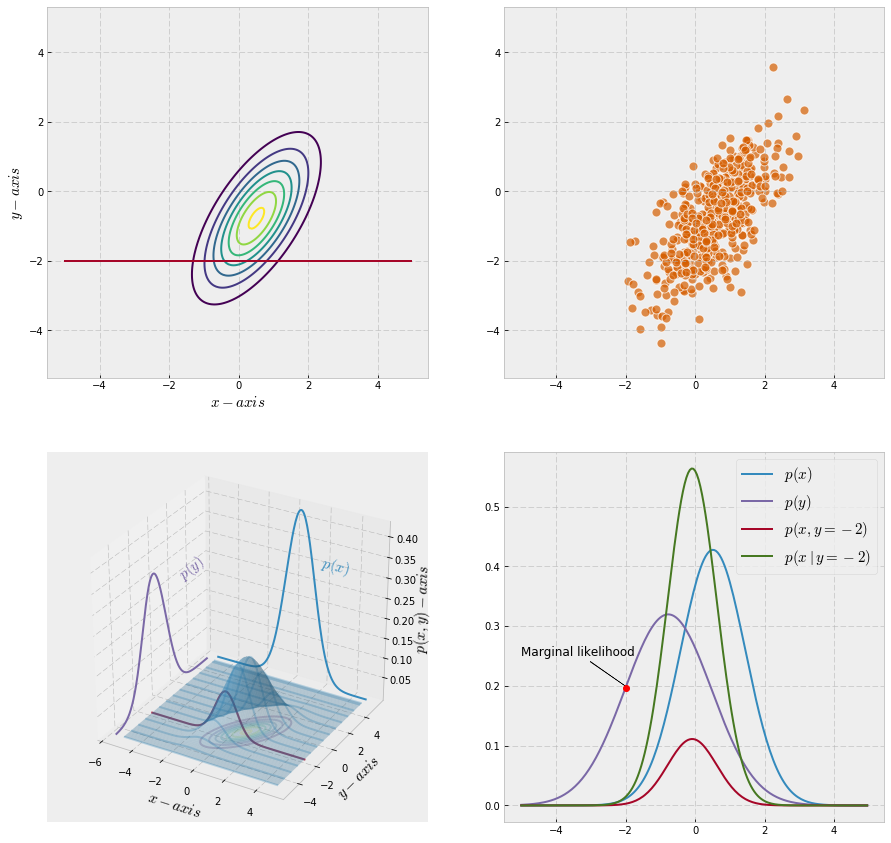

mean of p(x, y)
[ 0.51394334 -0.77316505]


cov of p(x, y)
[[ 0.87042769  0.75889144]
 [ 0.75889144  1.55760374]]


p(y=-2)=0.197174
Integration p(x) = 0.999999
Integration p(y) = 0.999644
Integration p(x,y=-2) = 0.197174
Integration p(x|y=-2) = p(x,y=-2)/p(y=-2) = 1.000000


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = (15, 15)

delta = 0.05
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
xx, yy = np.meshgrid(x, y)
given_y = -2
given_yv = np.ones(yy.shape[0])*given_y #같은 y값 

np.random.seed(14)

MU = np.random.rand(2)
MU[1] *= -1

M = np.random.rand(4).reshape(2,2)
COV = (M + M.T)/2
COV[0,1] += 0.6
COV[1,0] += 0.6
COV[1,1] += 0.6

# p(x,y)
Z  = mlab.bivariate_normal(xx, yy, sigmax=np.sqrt(COV[0,0]), 
                                    sigmay=np.sqrt(COV[1,1]), 
                                    mux=MU[0], 
                                    muy=MU[1],
                                    sigmaxy=COV[0,1])

# p(x, y=-2)
# y = -2로 값을 전부 만들어 냄 여기서 Z2는 NxN인데 행이 서로 다 같음
# 즉 한행에 p(x, y=-2)값이 다 담겨있음
Z2 = mlab.bivariate_normal(xx, given_yv, sigmax=np.sqrt(COV[0,0]), 
                                         sigmay=np.sqrt(COV[1,1]), 
                                         mux=MU[0], 
                                         muy=MU[1],
                                         sigmaxy=COV[0,1])

# Marginal distribution p(x), p(y)
Nx = 1/np.sqrt(2*np.pi*COV[0,0]) * np.exp(-1/(2*COV[0,0]) * (x - MU[0])**2 )
Ny = 1/np.sqrt(2*np.pi*COV[1,1]) * np.exp(-1/(2*COV[1,1]) * (y - MU[1])**2 )

# p(y = given_y)
N_given_y =  1/np.sqrt(2*np.pi*COV[1,1]) * np.exp(-1/(2*COV[1,1]) * (given_y - MU[1])**2 )

# conditional dist. p(x | y=-2)
Zx_given_y = Z2 / N_given_y

fig = plt.figure()

#좌상단
ax1 = fig.add_subplot(2, 2, 1)
CS = ax1.contour(xx, yy, Z)
ax1.plot(x, given_yv, color=style_colors[1])
ax1.set_xlabel(r'$x-axis$', fontsize=15)
ax1.set_ylabel(r'$y-axis$', fontsize=15)
ax1.axis('square')

#우상단
ax2 = fig.add_subplot(2, 2, 2, sharex=ax1, sharey=ax1)
rs = np.random.RandomState(10)
x1, x2 = rs.multivariate_normal(MU, COV, 500).T
ax2.scatter(x1, x2, color=style_colors[4], s=80, edgecolors="#FFFFFF", linewidth=1, alpha=0.7)

#좌하단
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.plot_wireframe(xx, yy, Z, rstride=15, cstride=0, alpha=0.3)#, colors="#348ABD")
ax3.plot_surface(xx, yy, Z, rcount=150, antialiased=True, alpha=0.3)
ax3.plot(x, given_yv, Z2[0], alpha=0.8, color=style_colors[1]) #p(x,y=const)
ax3.contour(xx, yy, Z, zdir='z', offset=-0.01, alpha=0.2)
ax3.plot(x, ax2.get_ylim()[1].repeat(x.shape), Nx, color=style_colors[0])
ax3.plot(ax2.get_xlim()[0].repeat(y.shape), y, Ny, color=style_colors[2])

ax3.set_xlabel(r'$x-axis$ ', fontsize=15)
ax3.set_ylabel(r'$y-axis$', fontsize=15)
ax3.set_zlabel(r'$p(x,y)-axis$', fontsize=15)
ax3.text(1.7, ax2.get_ylim()[1], 0.3, r'$p(x)$', color=style_colors[0], zdir='x', fontsize=15)
ax3.text(ax2.get_xlim()[0], 1.5, 0.3, r'$p(y)$', color=style_colors[2], zdir='y', fontsize=15)

#우하단 #ax3.set_ylim(ax2.get_zlim())
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(x, Nx, label=r"$p(x)$", color=style_colors[0])
ax4.plot(y, Ny, label=r"$p(y)$", color=style_colors[2])
ax4.plot(x, Z2[0], label=r"$p(x,y={})$".format(given_y), color=style_colors[1])
ax4.plot(x, Zx_given_y[0], label=r"$p(x \mid y={})$".format(given_y), color=style_colors[3])
ax4.plot(given_y, N_given_y, 'ro')
ax4.text(-5, 0.25, "Marginal likelihood", color='black', fontdict={ 'size': 12, })
ax4.arrow(-2, 0.2, -1, 0.04, head_width=0.001, head_length=0.02, fc='k', ec='k')
legend = ax4.legend(loc='upper right',fontsize=15)

plt.show()

print('mean of p(x, y)')
print(MU)
print('\n')

print('cov of p(x, y)')
print(COV)
print('\n')

print("p(y={})={:f}".format(given_y, N_given_y))
print("Integration p(x) = {:f}".format(np.trapz(Nx, x=x)))
print("Integration p(y) = {:f}".format(np.trapz(Ny, x=x)))
print("Integration p(x,y={}) = {:f}".format(given_y, np.trapz(Z2[0], x=x)))
print("Integration p(x|y={}) = p(x,y={})/p(y={}) = {:f}".format(given_y, given_y, given_y, np.trapz(Zx_given_y[0], x=x)))

위 그림은 프린트 정보에 나온 평균벡터와 공분산행렬로 정의되는 2변수 정규분포를 사용하여 그려진것이다.

$$
\boldsymbol{\mu} = (0.51394334, -0.77316505)^{\text{T}}
$$

$$
\boldsymbol{\Sigma} = \begin{bmatrix}
 0.87042769 &  0.75889144 \\
0.75889144 &  1.55760374
\end{bmatrix}
$$

실험에서는 그림을 그리기위해 $D=2$로 두었으며 $\mathbf{x}_a$, $\mathbf{x}_b$는 $x$, $y$로 스칼라가 된다. 

- 첫번째 그림은 결합 확률밀도함수 $p(x, y)$의 등고선<sup>iso-cost line</sup>을 그린것이다. 
- 두번째 그림은 이 확률밀도함수로부터 샘플을 생성시킨 그림이다.
- 세번째 그림은 이 결합 확률밀도함수를 3차원으로 그린것이며 각 축 끝부분에 주변 확률밀도함수 $p(x)=\mathcal{N} \left(x \mid \boldsymbol{\mu}_1, \boldsymbol{\Sigma}_{11} \right)$, $p(y)=\mathcal{N}(y \mid \boldsymbol{\mu}_2, \boldsymbol{\Sigma}_{22})$를 그려 놓았다. 
- 네번째 그림은 $p(x)$, $p(y)$, $p(x , y=-2)$, $p(x \mid y=-2)$를 함께 그린것이다.

공분산 행렬에 주대각요소를 제외한 요소가 0이 아니라서 등고선이 $x$, $y$축에 정렬되지 않고 비틀어져 있는것을 확인할 수 있다. 이 함수에서 $y$=-2로 고정한 빨간색 선을 따라 그래프를 제한하면 두번째 그림에서 보이는 빨간색 종모양 그래프 $p(x, y=-2)$가 된다. 세번째 그림에서 좀 더 정확하게 빨간색 그래프를 확인할 수 있다. 이 함수는 $p(x \mid y=-2)$이 아니라 $p(x , y=-2)$이다. 결합 확률밀도함수에서 하나의 변수만 특정 상수로 고정, 다시말해 주어진 것이기 때문이다. $p(x \mid y=-2)$이 되려면 베이즈정리에 의해 이 그래프를 $p(y=-2)$로 나누어야 한다. 세번째 그림의 빨간색 그래프를 빨간점의 값으로 나누면 녹색그래프가 되고 프로그램 출력을 확인해보면 이 녹색 그래프의 적분은 1이 되어 확률밀도함수임을 알 수 있다. 조건부 확률밀도함수가 되는 것이다.

만약 공분산 행렬이 주대각 행렬이면 $p(x , y)$은 $x$, $y$ 축에 정렬되고 $p(x , y)=p(x)p(y)$이다. 이 경우는 $p(x) = p(x \mid y=-2)$이 되어 두 확률분포는 독립이라는 결론과 합치하게 된다.

계수 비교를 해서 $p(x \mid y)$의 평균벡터와 공분산 행렬을 구하기 위해 보통의 다변수 정규분포의 지수함수부분을 전개해보면

$$
-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\text{T}}\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu}) = 
-\frac{1}{2}\mathbf{x}^{\text{T}}\boldsymbol{\Sigma}^{-1}\mathbf{x} + \mathbf{x}^{\text{T}}\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu} + \text{const} \tag{2.71}
$$

이 되므로 이와 식(2.70)을 비교하면 평균벡터와 공분산행렬을 구할 수 있다.

#### 계수비교를 위한 식(2.70) 추가 전개

$$
\color{Orchid}{-\frac{1}{2}\mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \mathbf{x}_a}
\color{RoyalBlue}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a }
\color{RoyalBlue}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa}^{\text{T}} \boldsymbol{\mu}_a }
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a  } \\
\color{RoyalBlue}{ -\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \mathbf{x}_b }
\color{RoyalBlue}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b }
\color{Gray}{ +\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \mathbf{x}_b }
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b } \\
\color{RoyalBlue}{ -\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ba}^{\text{T}} \mathbf{x}_b }
\color{Gray}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a }
\color{RoyalBlue}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ba}^{\text{T}} \boldsymbol{\mu}_b }
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a } \\
\color{Gray}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b }
\color{Gray}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
\color{Gray}{ +\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b }
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b } \tag{5}
$$

식(5)은 결합 확률밀도함수 $p(\mathbf{x})$의 지수함수 부분을 전개한 식(2.70)을 완전히 전개한 것이다. 분홍색 $\mathbf{x}_a$에 대한 2차항은 식(2.71)의 2차항과 비교하여 

$$
\boldsymbol{\Sigma}_{a|b} = \boldsymbol{\Lambda}_{aa}^{-1} \tag{2.73}
$$

을 바로 보일 수 있다. 그리고 파란색 1차항만 모으면

$$
\begin{align}
&\color{RoyalBlue}{\mathbf{x}_a^{\text{T}} \left(\frac{1}{2} \boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a 
+\frac{1}{2} \boldsymbol{\Lambda}_{aa}^{\text{T}} \boldsymbol{\mu}_a 
-\frac{1}{2} \boldsymbol{\Lambda}_{ab} \mathbf{x}_b 
+\frac{1}{2} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b 
-\frac{1}{2} \boldsymbol{\Lambda}_{ba}^{\text{T}} \mathbf{x}_b 
{ +\frac{1}{2} \boldsymbol{\Lambda}_{ba}^{\text{T}} \boldsymbol{\mu}_b } \right)} \\[5pt]
&= \mathbf{x}_a^{\text{T}} \left(\boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a
-\frac{1}{2}(\boldsymbol{\Lambda}_{ab}+\boldsymbol{\Lambda}_{ba}^{\text{T}}) \mathbf{x}_b
+\frac{1}{2}(\boldsymbol{\Lambda}_{ab}+\boldsymbol{\Lambda}_{ba}^{\text{T}})\boldsymbol{\mu}_b \right) \qquad \because \boldsymbol{\Lambda}_{aa}=\boldsymbol{\Lambda}_{aa}^{\text{T}} \\[5pt]
&= \mathbf{x}_a^{\text{T}} \left(\boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a
-\frac{1}{2}(\boldsymbol{\Lambda}_{ab}+\boldsymbol{\Lambda}_{ba}^{\text{T}})(\mathbf{x}_b -\boldsymbol{\mu}_b)  \right) \qquad \because \boldsymbol{\Lambda}_{ba}^{\text{T}}=\boldsymbol{\Lambda}_{ab} \\[5pt]
&= \mathbf{x}_a^{\text{T}} \left\{ \boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a - \boldsymbol{\Lambda}_{ab}(\mathbf{x}_b -\boldsymbol{\mu}_b) \right\}
\end{align} \tag{2.74}
$$

이 되고 이 식(2.74)를 식(2.71)하고 비교하면 식(2.75)를 보일 수 있다.

$$
\boldsymbol{\mu}_{a|b}
= \boldsymbol{\Sigma}_{a|b} \left\{ \boldsymbol{\Lambda}_{aa}\boldsymbol{\mu}_a  - \boldsymbol{\Lambda}_{ab}(\mathbf{x}_b-\boldsymbol{\mu}_b) \right\}
= \boldsymbol{\mu}_{a} - \boldsymbol{\Lambda}_{aa}^{-1} \boldsymbol{\Lambda}_{ab}(\mathbf{x}_b - \boldsymbol{\mu}_{b}) \tag{2.75}
$$


식(2.75)를 보면 평균벡터가 $\mathbf{x}_a$에 의존하지 않고 $\mathbf{x}_b$에만 선형적으로 의존하는 것을 알 수 있다. 이는 그림으로도 확인할 수 있다. 위 그림에서 녹색 그래프는 빨간색 그래프를 스케일한것이라 평균이 변하지 않는다. 그리고 빨간색 그래프를 $p(x , y)$로 부터 잘라낼 때 어느 위치에서 잘라내는가 하는 것은 $y$의 위치에 의해 결정된다. 때문에 $p(x \mid y)$의 모드<sup>mode</sup> 위치는 $y$축에서 어디를 선택하여 자르는가에만 의존한다는 것을 직관적으로 알 수 있다. 조건부 확류분포의 평균이 조건으로 주어진 확률변수 $y$와 선형관계에 있고, 공분산이 $x$와 독립일때 이런 경우를 선형 가우시안 모델<sup>linear gaussian model</sup>이라한다. 이렇게 구성된 $p(x)$, $p(x \mid y)$를 알 때 $p(y)$, $p(y \mid x)$를 구하는 내용이 2.3.3절에 나온다. 

식(2.73), (2.75)는 정밀도 행렬로 표현되는데 이를 공분산 행렬로 표현하려면 행렬에 대한 몇가지 정리가 필요하다. 차례대로 살펴본다.

#### 식(2.76)-블록 행렬의 역행렬, 연습문제 2.24

$$
\begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}
$$

위 처럼 행렬로 분해된 행렬의 역행렬을 구하기 위해 앞뒤에 적당한 행렬을 곱해서 대각행렬로 만든다. 왜냐하면 대각행렬의 역행렬은 주대각 요소에 역수를 취함으로 쉽게 만들 수 있기 때문이다.<sup>[1],[2]</sup>

- 주어진 행렬 앞에 어떤 행렬을 곱해서 (1,2) 요소를 0행렬로 만들기

$$
\begin{bmatrix}
\mathbf{I} & -\mathbf{B}\mathbf{D}^{-1} \\
\mathbf{0} & \mathbf{I}
\end{bmatrix}
\begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}=
\begin{bmatrix}
\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C} & \mathbf{B}-\mathbf{B}\mathbf{D}^{-1}\mathbf{D} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}=
\begin{bmatrix}
\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C} & \mathbf{0} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}
$$

- 주어진 행렬 뒤에 어떤 행렬을 곱해서 (2,1)요소를 0행렬로 만들기

$$
\begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}
\begin{bmatrix}
\mathbf{I} & \mathbf{0} \\
-\mathbf{D}^{-1}\mathbf{C} & \mathbf{I}
\end{bmatrix}=
\begin{bmatrix}
\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C} & \mathbf{B} \\
\mathbf{C}-\mathbf{D}\mathbf{D}^{-1}\mathbf{C} & \mathbf{D}
\end{bmatrix}=
\begin{bmatrix}
\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C} & \mathbf{B} \\
\mathbf{0} & \mathbf{D}
\end{bmatrix}
$$

- 종합하기

$$
\underbrace{\begin{bmatrix}
\mathbf{I} & -\mathbf{B}\mathbf{D}^{-1} \\
\mathbf{0} & \mathbf{I}
\end{bmatrix}}_{\mathbf{X}}
\underbrace{\begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}}_{\mathbf{Y}}
\underbrace{\begin{bmatrix}
\mathbf{I} & \mathbf{0} \\
-\mathbf{D}^{-1}\mathbf{C} & \mathbf{I}
\end{bmatrix}}_{\mathbf{Z}}=
\underbrace{\begin{bmatrix}
\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C} & \mathbf{0} \\
\mathbf{0} & \mathbf{D}
\end{bmatrix}}_{\mathbf{W}}
$$

이제 $\mathbf{W}$의 역행렬을 구하는것 만으로 주어진 행렬의 역행렬을 구할 수 있게 된다.

$$
(\mathbf{XYZ})^{-1} = \mathbf{W}^{-1} \\[5pt]
\mathbf{Z}^{-1} \mathbf{Y}^{-1} \mathbf{X}^{-1}  = \mathbf{W}^{-1}  \\[5pt]
\mathbf{Y}^{-1} = \mathbf{Z}\mathbf{W}^{-1}\mathbf{X}
$$

따라서 

$$
\begin{align}
\begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}^{-1}&=
\begin{bmatrix}
\mathbf{I} & \mathbf{0} \\
-\mathbf{D}^{-1}\mathbf{C} & \mathbf{I}
\end{bmatrix}
\begin{bmatrix}
(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1} & \mathbf{0} \\
\mathbf{0} & \mathbf{D}^{-1}
\end{bmatrix}
\begin{bmatrix}
\mathbf{I} & -\mathbf{B}\mathbf{D}^{-1} \\
\mathbf{0} & \mathbf{I}
\end{bmatrix} \\[5pt]
&=\begin{bmatrix}
(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1} & \mathbf{0} \\
-\mathbf{D}^{-1}\mathbf{C}(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1} & \mathbf{D}^{-1}
\end{bmatrix}
\begin{bmatrix}
\mathbf{I} & -\mathbf{B}\mathbf{D}^{-1} \\
\mathbf{0} & \mathbf{I}
\end{bmatrix}\\[5pt]
&=\begin{bmatrix}
\color{RoyalBlue}{(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1}} & \color{RoyalBlue}{(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1}}(-\mathbf{B}\mathbf{D}^{-1}) \\
-\mathbf{D}^{-1}\mathbf{C}\color{RoyalBlue}{(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1}} & -\mathbf{D}^{-1}\mathbf{C}\color{RoyalBlue}{(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1}}(-\mathbf{B}\mathbf{D}^{-1})+\mathbf{D}^{-1}
\end{bmatrix} \\[5pt]
&=\begin{bmatrix}
\color{RoyalBlue}{\mathbf{M}} & -\color{RoyalBlue}{\mathbf{M}}\mathbf{B}\mathbf{D}^{-1} \\
-\mathbf{D}^{-1}\mathbf{C}\color{RoyalBlue}{\mathbf{M}} & \mathbf{D}^{-1}+\mathbf{D}^{-1}\mathbf{C}\color{RoyalBlue}{\mathbf{M}}\mathbf{B}\mathbf{D}^{-1}
\end{bmatrix}
\end{align} \tag{2.76}
$$

약간 다른 방법으로도 같은 논리를 전개할 수 있다. 다시 반복해본다.

- 주어진 행렬 앞에 어떤 행렬을 곱해서 (2,1) 요소를 0행렬로 만들기

$$
\begin{bmatrix}
\mathbf{I} & \mathbf{0} \\
-\mathbf{C}\mathbf{A}^{-1} & \mathbf{I}
\end{bmatrix}
\begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}=
\begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
-\mathbf{C}\mathbf{A}^{-1}\mathbf{A}+\mathbf{C} & -\mathbf{C}\mathbf{A}^{-1}\mathbf{B}+\mathbf{D}
\end{bmatrix}=
\begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{0} & -\mathbf{C}\mathbf{A}^{-1}\mathbf{B}+\mathbf{D}
\end{bmatrix}
$$

- 주어진 행렬 뒤에 어떤 행렬을 곱해서 (1,2)요소를 0행렬로 만들기

$$
\begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}
\begin{bmatrix}
\mathbf{I} & -\mathbf{A}^{-1}\mathbf{B} \\
\mathbf{0} & \mathbf{I}
\end{bmatrix}=
\begin{bmatrix}
\mathbf{A} & -\mathbf{A}\mathbf{A}^{-1}\mathbf{B}+\mathbf{B} \\
\mathbf{C} & -\mathbf{C}\mathbf{A}^{-1}\mathbf{B}+\mathbf{D}
\end{bmatrix}=
\begin{bmatrix}
\mathbf{A} & \mathbf{0} \\
\mathbf{C} & -\mathbf{C}\mathbf{A}^{-1}\mathbf{B}+\mathbf{D}
\end{bmatrix}
$$

- 종합하기

$$
\underbrace{\begin{bmatrix}
\mathbf{I} & \mathbf{0} \\
-\mathbf{C}\mathbf{A}^{-1} & \mathbf{I}
\end{bmatrix}}_{\mathbf{X}}
\underbrace{\begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}}_{\mathbf{Y}}
\underbrace{\begin{bmatrix}
\mathbf{I} & -\mathbf{A}^{-1}\mathbf{B} \\
\mathbf{0} & \mathbf{I}
\end{bmatrix}}_{\mathbf{Z}}=
\underbrace{\begin{bmatrix}
\mathbf{A} & \mathbf{0} \\
\mathbf{0} & -\mathbf{C}\mathbf{A}^{-1}\mathbf{B}+\mathbf{D}
\end{bmatrix}}_{\mathbf{W}}
$$

이제 $\mathbf{W}$의 역행렬을 구하는것 만으로 주어진 행렬의 역행렬을 구할 수 있게 된다.

$$
(\mathbf{XYZ})^{-1} = \mathbf{W}^{-1} \\[5pt]
\mathbf{Z}^{-1} \mathbf{Y}^{-1} \mathbf{X}^{-1}  = \mathbf{W}^{-1}  \\[5pt]
\mathbf{Y}^{-1} = \mathbf{Z}\mathbf{W}^{-1}\mathbf{X}
$$

따라서 

$$
\begin{align}
\begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}^{-1}&=
\begin{bmatrix}
\mathbf{I} & -\mathbf{A}^{-1}\mathbf{B} \\
\mathbf{0} & \mathbf{I}
\end{bmatrix}
\begin{bmatrix}
\mathbf{A}^{-1} & \mathbf{0} \\
\mathbf{0} & (-\mathbf{C}\mathbf{A}^{-1}\mathbf{B}+\mathbf{D})^{-1}
\end{bmatrix}
\begin{bmatrix}
\mathbf{I} & \mathbf{0} \\
-\mathbf{C}\mathbf{A}^{-1} & \mathbf{I}
\end{bmatrix} \\[5pt]
&=\begin{bmatrix}
\mathbf{A}^{-1} & -\mathbf{A}^{-1}\mathbf{B}(-\mathbf{C}\mathbf{A}^{-1}\mathbf{B}+\mathbf{D})^{-1} \\
\mathbf{0} & (-\mathbf{C}\mathbf{A}^{-1}\mathbf{B}+\mathbf{D})^{-1}
\end{bmatrix}
\begin{bmatrix}
\mathbf{I} & \mathbf{0} \\
-\mathbf{C}\mathbf{A}^{-1} & \mathbf{I}
\end{bmatrix} \\[5pt]
&=\begin{bmatrix}
\mathbf{A}^{-1}-\mathbf{A}^{-1}\mathbf{B}(-\mathbf{C}\mathbf{A}^{-1}\mathbf{B}+\mathbf{D})^{-1}(-\mathbf{C}\mathbf{A}^{-1}) & -\mathbf{A}^{-1}\mathbf{B}(-\mathbf{C}\mathbf{A}^{-1}\mathbf{B}+\mathbf{D})^{-1} \\
-\mathbf{C}\mathbf{A}^{-1}(-\mathbf{C}\mathbf{A}^{-1}\mathbf{B}+\mathbf{D})^{-1} & (-\mathbf{C}\mathbf{A}^{-1}\mathbf{B}+\mathbf{D})^{-1}
\end{bmatrix} \\[5pt]
&=\begin{bmatrix}
\mathbf{A}^{-1}+\mathbf{A}^{-1}\mathbf{B}\color{RoyalBlue}{(\mathbf{D}-\mathbf{C}\mathbf{A}^{-1}\mathbf{B})^{-1}}\mathbf{C}\mathbf{A}^{-1} & -\mathbf{A}^{-1}\mathbf{B}\color{RoyalBlue}{(\mathbf{D}-\mathbf{C}\mathbf{A}^{-1}\mathbf{B})^{-1}} \\
-\color{RoyalBlue}{(\mathbf{D}-\mathbf{C}\mathbf{A}^{-1}\mathbf{B})^{-1}}\mathbf{C}\mathbf{A}^{-1} & \color{RoyalBlue}{(\mathbf{D}-\mathbf{C}\mathbf{A}^{-1}\mathbf{B})^{-1}}
\end{bmatrix}
\end{align} \tag{2.76-1}
$$

특히 색깔로 표시된 부분의 역행렬을 원래 행렬의 **슈어 보수행렬**<sup>Schur complement [3]</sup>이라 한다.

#### Woodbury matrix identity

위 두 결과 식(2.76), (2.76-1)을 비교하는것으로 다음과 같이 슈어 보수행렬간의 관계를 보일 수 있다.

$$
(\mathbf{A}+\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1} = \mathbf{A}^{-1}-\mathbf{A}^{-1}\mathbf{B}(\mathbf{D}+\mathbf{C}\mathbf{A}^{-1}\mathbf{B})^{-1}\mathbf{C}\mathbf{A}^{-1}
$$


두 식을 같게 놓고

$$
\begin{align}
\boldsymbol{\Sigma}^{-1}&=
\begin{bmatrix}
\color{RoyalBlue}{(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1}} & \color{RoyalBlue}{(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1}}(-\mathbf{B}\mathbf{D}^{-1}) \\
-\mathbf{D}^{-1}\mathbf{C}\color{RoyalBlue}{(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1}} & -\mathbf{D}^{-1}\mathbf{C}\color{RoyalBlue}{(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1}}(-\mathbf{B}\mathbf{D}^{-1})+\mathbf{D}^{-1}
\end{bmatrix} \\[5pt]
&=\begin{bmatrix}
\mathbf{A}^{-1}+\mathbf{A}^{-1}\mathbf{B}\color{RoyalBlue}{(\mathbf{D}-\mathbf{C}\mathbf{A}^{-1}\mathbf{B})^{-1}}\mathbf{C}\mathbf{A}^{-1} & -\mathbf{A}^{-1}\mathbf{B}\color{RoyalBlue}{(\mathbf{D}-\mathbf{C}\mathbf{A}^{-1}\mathbf{B})^{-1}} \\
-\color{RoyalBlue}{(\mathbf{D}-\mathbf{C}\mathbf{A}^{-1}\mathbf{B})^{-1}}\mathbf{C}\mathbf{A}^{-1} & \color{RoyalBlue}{(\mathbf{D}-\mathbf{C}\mathbf{A}^{-1}\mathbf{B})^{-1}}
\end{bmatrix}\\[5pt]
&= \begin{bmatrix}
\boldsymbol{\Lambda}_{aa} & \boldsymbol{\Lambda}_{ab} \\
\boldsymbol{\Lambda}_{ba} & \boldsymbol{\Lambda}_{bb}
\end{bmatrix}
\end{align}
$$

각 요소를 비교하여 다음을 얻는다.

$$
\boldsymbol{\Lambda}_{aa} = \color{RoyalBlue}{(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1}} = \mathbf{A}^{-1}+\mathbf{A}^{-1}\mathbf{B}\color{RoyalBlue}{(\mathbf{D}-\mathbf{C}\mathbf{A}^{-1}\mathbf{B})^{-1}}\mathbf{C}\mathbf{A}^{-1}
$$

$$
\boldsymbol{\Lambda}_{bb} = -\mathbf{D}^{-1}\mathbf{C}\color{RoyalBlue}{(\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C})^{-1}}(-\mathbf{B}\mathbf{D}^{-1})+\mathbf{D}^{-1} = \color{RoyalBlue}{(\mathbf{D}-\mathbf{C}\mathbf{A}^{-1}\mathbf{B})^{-1}}
$$

#### Determinant of a partitioned symmetric matrix<sup>[4],[5]</sup>

부분 행렬 $\mathbf{A}$, $\mathbf{B}$, $\mathbf{C}$, $\mathbf{D}$가 각각 n x n, n x m, m x n, m x n인 행렬 $\mathbf{M}$에 대해 다음처럼 슈어 보수행렬을 포함하는 행렬로 분해가 가능하다.

$$
\mathbf{M} = \begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}=\begin{bmatrix}
\mathbf{A} & \mathbf{0} \\
\mathbf{C} & \mathbf{I}_m
\end{bmatrix}
\begin{bmatrix}
\mathbf{I}_n & \mathbf{A}^{-1}\mathbf{B} \\
\mathbf{0} & \color{RoyalBlue}{\mathbf{D}-\mathbf{C}\mathbf{A}^{-1}\mathbf{B}}
\end{bmatrix} = 
\begin{bmatrix}
\mathbf{I}_n & \mathbf{B} \\
\mathbf{0} & \mathbf{D}
\end{bmatrix}
\begin{bmatrix}
\color{RoyalBlue}{\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C}} & \mathbf{0} \\
\mathbf{D}^{-1}\mathbf{C} & \mathbf{I}_m
\end{bmatrix}
$$

그리고 행렬식에 대한

$$\det(\mathbf{AB}) = \det(\mathbf{A})\det(\mathbf{B})$$

$$
\det\left(
\begin{bmatrix}
\mathbf{B} & \mathbf{0} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix}
\right) = \det\left(
\begin{bmatrix}
\mathbf{B} & \mathbf{C} \\
\mathbf{0} & \mathbf{D}
\end{bmatrix}
\right)
=\det(\mathbf{B})\det(\mathbf{D})
$$

위 두 식을 적용하면 다음을 보일 수 있다.

$$
\det( \mathbf{M} ) = \det\left( \begin{bmatrix}
\mathbf{A} & \mathbf{B} \\
\mathbf{C} & \mathbf{D}
\end{bmatrix} \right) = \det(\mathbf{D}) \det(\color{RoyalBlue}{\mathbf{A}-\mathbf{B}\mathbf{D}^{-1}\mathbf{C}}) = \det( \mathbf{A})\det(\color{RoyalBlue}{\mathbf{D}-\mathbf{C}\mathbf{A}^{-1}\mathbf{B}})
$$

위 결과들을 이용해서 결합 정규확률분포에 대한 주변 확률분포를 구하게 된다.

#### 참고문헌
1. https://en.wikipedia.org/wiki/Woodbury_matrix_identity
2. 머신러닝Machine Learning: A Probabilistic Perspective, Kevin P. Murphy,노영찬,김기성(옮김), The MIT Press, 에이콘
3. https://ko.wikipedia.org/wiki/슈어_보수행렬
4. https://en.wikipedia.org/wiki/Determinant#Block_matrices
5. http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/node6.html


### 2.3.2 Marginal Gaussian distributions
<hr/>

이제 결합 확률분포로를 다음과 같이 $\mathbf{x}_b$에 대해 적분하여 $\mathbf{x}_a$에 대해 주변화 시키는 과정을 알아 본다.

$$
p(\mathbf{x}_a) = \int p(\mathbf{x}_a, \mathbf{x}_b) \text{d} \mathbf{x}_b \tag{2.83}
$$

PRML책에서는 $p(\mathbf{x}_a)$도 정규분포라는 사실을 상정하고 완전제곱 테크닉을 이용해서 평균과 공분산만을 구하고 있다. 여기서는 $p(\mathbf{x}_a)$가 제대로 정규화된 가우시안이라는 것을 직접적으로 단계별로 확인 해본다. 식이 많이 길고 복잡하다.

#### $\mathbf{x}_b$에 대한 적분 식(2.84)~(2.86)

$$
\begin{align}
\int p(\mathbf{x}_a, \mathbf{x}_b) \text{d} \mathbf{x}_b 
&=  \int \frac{1}{(2 \pi)^{D/2}}\frac{1}{\left\vert\boldsymbol{\Sigma}\right\vert^{1/2}} \exp \left\{  -\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\text{T}} \boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu})  \right\}  \text{d} \mathbf{x}_b \\[5pt]
&=  \int \frac{1}{(2 \pi)^{D/2}}\frac{1}{\left\vert\boldsymbol{\Sigma}\right\vert^{1/2}} 
\exp \left\{
\color{Orchid}{-\frac{1}{2}\mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \mathbf{x}_a}
\color{Orchid}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a }
\color{Orchid}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa}^{\text{T}} \boldsymbol{\mu}_a }
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a  } \\
\color{RoyalBlue}{ -\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \mathbf{x}_b }
\color{Orchid}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b }
\color{RoyalBlue}{ +\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \mathbf{x}_b }
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b } \\
\color{RoyalBlue}{ -\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ba}^{\text{T}} \mathbf{x}_b }
\color{RoyalBlue}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a }
\color{Orchid}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ba}^{\text{T}} \boldsymbol{\mu}_b }
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a } \\
\color{RoyalBlue}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b }
\color{RoyalBlue}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
\color{RoyalBlue}{ +\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b }
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
\right\} \text{d} \mathbf{x}_b
\end{align}
$$

앞서 정리한 식(2.70)을 이용하여 적분식의 지수 함수 부분을 전개하면 위와 같다. 적분변수는 $\mathbf{x}_b$이므로 $\mathbf{x}_b$에 대한 항만 다시 적어보면

$$
\begin{align}
&\color{RoyalBlue}{ -\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \mathbf{x}_b }
\color{RoyalBlue}{ +\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \mathbf{x}_b }
\color{RoyalBlue}{ -\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ba}^{\text{T}} \mathbf{x}_b }
\color{RoyalBlue}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a }
\color{RoyalBlue}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b }
\color{RoyalBlue}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
\color{RoyalBlue}{ +\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b } \\[5pt]
=& 
\color{Black}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{ab}^{\text{T}} \mathbf{x}_a }
\color{Black}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{ab}^{\text{T}} \boldsymbol{\mu}_a }
\color{Black}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \mathbf{x}_a }
\color{Black}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a }
\color{Black}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b }
\color{Black}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
\color{Black}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb}^{\text{T}} \boldsymbol{\mu}_b } \\[5pt]
=&
\color{Black}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \mathbf{x}_a }
\color{Black}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a }
\color{Black}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \mathbf{x}_a }
\color{Black}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a }
 \color{Black}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b }
\color{Black}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
\color{Black}{ +\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b } \quad \because \boldsymbol{\Lambda}_{ab}^{\text{T}}=\boldsymbol{\Lambda}_{ba}, \quad \boldsymbol{\Lambda}_{bb}^{\text{T}}=\boldsymbol{\Lambda}_{bb} \\[5pt]
=&
\color{Black}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b }
+\mathbf{x}_b^{\text{T}} \left(
\color{Black}{ -\frac{1}{2} \boldsymbol{\Lambda}_{ba} \mathbf{x}_a }
\color{Black}{ +\frac{1}{2} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a }
\color{Black}{ -\frac{1}{2} \boldsymbol{\Lambda}_{ba} \mathbf{x}_a }
\color{Black}{ +\frac{1}{2} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a }
\color{Black}{ +\frac{1}{2} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
\color{Black}{ +\frac{1}{2} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
\right) \\[5pt]
=&
\color{Black}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b }
+\mathbf{x}_b^{\text{T}} \left(
\color{Black}{ \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
\color{Black}{ -\boldsymbol{\Lambda}_{ba} \mathbf{x}_a }
\color{Black}{ +\boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a }
\right) \\[5pt]
=&
\color{Black}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b }
+\mathbf{x}_b^{\text{T}} \left(
\color{Black}{ \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
\color{Black}{ -\boldsymbol{\Lambda}_{ba} ( \mathbf{x}_a - \boldsymbol{\mu}_a)}
\right)
\end{align}
$$

이고, $\mathbf{x}_b$와 상관없는 9개항을 지수법칙에 의해 지수항의 곱하기로 바꿔 적분밖으로 빼내면 결국 적분식은 다음처럼 된다.

$$
\int p(\mathbf{x}_a, \mathbf{x}_b) \text{d} \mathbf{x}_b  = \frac{1}{(2 \pi)^{D/2}}\frac{1}{\left\vert\boldsymbol{\Sigma}\right\vert^{1/2}} \exp (\color{Black}{\textit{remainder}}) \int \exp \left\{ \color{Black}{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b }
+\mathbf{x}_b^{\text{T}} \left(
\color{Black}{ \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
\color{Black}{ -\boldsymbol{\Lambda}_{ba} ( \mathbf{x}_a - \boldsymbol{\mu}_a)}
\right) \right\}
\text{d} \mathbf{x}_b \tag{1}
$$

위 식에서 remainder는 $\mathbf{x}_b$와 상관없는 항들을 나타낸다. 이제 지수함수 부분의 적분을 위해 식을 약간 변경한다.

$$
\mathbf{m} = 
\boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b
-\boldsymbol{\Lambda}_{ba} ( \mathbf{x}_a - \boldsymbol{\mu}_a) \tag{2.85}
$$

$\mathbf{x}_b$의 1차항 부분을 식(2.85)처럼 간단히 치환하면 적분식은 다음처럼된다.

$$
\int \exp \left\{ -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b
+\mathbf{x}_b^{\text{T}} \mathbf{m} \right\}
\text{d} \mathbf{x}_b \tag{2}
$$

이를 $\mathbf{x}_b$의 완전제곱식과 비교하여 식을 변경한다.

$$
-\frac{1}{2}(\mathbf{x}_b^{\text{T}} - \mathbf{k})^{\text{T}} \boldsymbol{\Lambda}_{bb} (\mathbf{x}_b^{\text{T}} - \mathbf{k})
=-\frac{1}{2}\mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b + \mathbf{x}_b^{\text{T}}\boldsymbol{\Lambda}_{bb}\mathbf{k}-\frac{1}{2}\mathbf{k}^{\text{T}}\boldsymbol{\Lambda}_{bb}\mathbf{k}
$$

위 식을 식(2)와 비교하면 $\mathbf{m} = \boldsymbol{\Lambda}_{bb}\mathbf{k}$ 이고, $\mathbf{k}=\boldsymbol{\Lambda}_{bb}^{-1}\mathbf{m}$이 된다. 양변에 $\frac{1}{2}\mathbf{k}^{\text{T}}\boldsymbol{\Lambda}_{bb}\mathbf{k}$를 더하고 $\mathbf{k}=\boldsymbol{\Lambda}_{bb}^{-1}\mathbf{m}$을 대입하면 식(2.84)를 유도할 수 있다.

$$
 -\frac{1}{2} \mathbf{x}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \mathbf{x}_b+\mathbf{x}_b^{\text{T}} \mathbf{m}
 = -\frac{1}{2}(\mathbf{x}_b - \boldsymbol{\Lambda}_{bb}^{-1} \mathbf{m} )^{\text{T}} \boldsymbol{\Lambda}_{bb} (\mathbf{x}_b - \boldsymbol{\Lambda}_{bb}^{-1} \mathbf{m}) + \frac{1}{2} \mathbf{m}^{\text{T}} \boldsymbol{\Lambda}_{bb}^{-1} \mathbf{m} \tag{2.84}
$$

왜 이런짓을 하냐하면 지수함수 안에 있는 항을 $\mathbf{x}_b$의 완전제곱꼴로 바꾸기 위해서이다. 얻어진 결과를 이용하여 식(1)을 다시 써보면

$$
\int p(\mathbf{x}_a, \mathbf{x}_b) \text{d} \mathbf{x}_b  = \frac{1}{(2 \pi)^{D/2}}\frac{1}{\left\vert\boldsymbol{\Sigma}\right\vert^{1/2}} \exp (\color{Black}{\textit{remainder}}) \int \exp \left\{ 
-\frac{1}{2}(\mathbf{x}_b - \boldsymbol{\Lambda}_{bb}^{-1} \mathbf{m} )^{\text{T}} \boldsymbol{\Lambda}_{bb} (\mathbf{x}_b - \boldsymbol{\Lambda}_{bb}^{-1} \mathbf{m}) + \frac{1}{2} \mathbf{m}^{\text{T}} \boldsymbol{\Lambda}_{bb}^{-1} \mathbf{m}
\right\}
\text{d} \mathbf{x}_b 
$$

이 되는데 식(2.85)의 $\mathbf{m}$은 $\mathbf{x}_b$와 상관없는 항이므로 

$$
\int p(\mathbf{x}_a, \mathbf{x}_b) \text{d} \mathbf{x}_b  = \frac{1}{(2 \pi)^{D/2}}\frac{1}{\left\vert\boldsymbol{\Sigma}\right\vert^{1/2}} \exp (\color{Black}{\textit{remainder}}) \exp \left\{\frac{1}{2} \mathbf{m}^{\text{T}} \boldsymbol{\Lambda}_{bb}^{-1} \mathbf{m} \right\} \int \exp \left\{ 
-\frac{1}{2}(\mathbf{x}_b - \boldsymbol{\Lambda}_{bb}^{-1} \mathbf{m} )^{\text{T}} \boldsymbol{\Lambda}_{bb} (\mathbf{x}_b - \boldsymbol{\Lambda}_{bb}^{-1} \mathbf{m}) 
\right\}
\text{d} \mathbf{x}_b 
$$

가 된다. 이제 남은 적분항은 $\mathbf{x}_b$의 완전제곱꼴이 되어 정규화되지 않은 가우시안(변수가 $\mathbf{x}_b$, 평균벡터가 $\boldsymbol{\Lambda}_{bb}^{-1} \mathbf{m}$, 공분산행렬이 $\boldsymbol{\Lambda}_{bb}^{-1}$인)이 되고 이를 적분하면 정규화 상수가 되기 때문에 적분결과는 

$$
(2\pi)^{D_{b}/2}\left\vert \boldsymbol{\Lambda}_{bb}^{-1} \right\vert^{1/2}
$$

이 됨을 쉽게 알 수 있다. 따라서 식(1)은 적분 후 아래처럼 된다.
 
$$
\int p(\mathbf{x}_a, \mathbf{x}_b) \text{d} \mathbf{x}_b  = \frac{1}{(2 \pi)^{D/2}}\frac{1}{\left\vert\boldsymbol{\Sigma}\right\vert^{1/2}} (2\pi)^{D_{b}/2}\left\vert \boldsymbol{\Lambda}_{bb}^{-1} \right\vert^{1/2}
\exp (\color{Black}{\textit{remainder}}) \exp \left\{
\color{RoyalBlue}{\frac{1}{2} \mathbf{m}^{\text{T}} \boldsymbol{\Lambda}_{bb}^{-1} \mathbf{m} }
\right\} \tag{3}
$$

여기서

$$
\textit{remainder} = 
\color{Orchid}{-\frac{1}{2}\mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \mathbf{x}_a}
\color{Orchid}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a }
\color{Orchid}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa}^{\text{T}} \boldsymbol{\mu}_a }
\color{Orchid}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b }
\color{Orchid}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ba}^{\text{T}} \boldsymbol{\mu}_b } \\
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a  } 
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b } 
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a } 
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
$$

이제 곱해진 지수함수들을 하나의 지수함수로 만들면 지수함수는

$$
\exp \left\{
\color{RoyalBlue}{\frac{1}{2} \mathbf{m}^{\text{T}} \boldsymbol{\Lambda}_{bb}^{-1} \mathbf{m} } 
\color{Orchid}{-\frac{1}{2}\mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \mathbf{x}_a}
\color{Orchid}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a }
\color{Orchid}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa}^{\text{T}} \boldsymbol{\mu}_a }
\color{Orchid}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b }
\color{Orchid}{ +\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ba}^{\text{T}} \boldsymbol{\mu}_b } \\
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a  } 
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b } 
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a } 
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b }
\right\}
$$

가 된다. 파란색식을 원래대로 쓰면 지수함수안의 항은 다음과 같다.

$$
\color{RoyalBlue}{\frac{1}{2} \left[\boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b - \boldsymbol{\Lambda}_{ba} ( \mathbf{x}_a - \boldsymbol{\mu}_a)\right]^{\text{T}} \boldsymbol{\Lambda}_{bb}^{-1} \left[\boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b - \boldsymbol{\Lambda}_{ba} ( \mathbf{x}_a - \boldsymbol{\mu}_a)\right] } 
\color{Orchid}{-\frac{1}{2}\mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \mathbf{x}_a}
\color{Orchid}{+\mathbf{x}_a^{\text{T}}(\boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a + \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b )} \\
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a } 
\color{ForestGreen}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b } 
\color{ForestGreen}{ -\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a } 
\color{ForestGreen}{ -\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b } \tag{4}
$$

이제 파란부분을 전개해서 정리하면

$$
\begin{align}
&\color{RoyalBlue}{\frac{1}{2} \left[ \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b-\boldsymbol{\Lambda}_{ba} ( \mathbf{x}_a - \boldsymbol{\mu}_a)\right]^{\text{T}} \boldsymbol{\Lambda}_{bb}^{-1} \left[\boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b-\boldsymbol{\Lambda}_{ba} ( \mathbf{x}_a - \boldsymbol{\mu}_a)\right] } \\[5pt]
=& \color{Black}{\frac{1}{2} \left[ \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} -( \mathbf{x}_a^{\text{T}} - \boldsymbol{\mu}_a^{\text{T}})\boldsymbol{\Lambda}_{ab} \right] \boldsymbol{\Lambda}_{bb}^{-1} \left[\boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b-\boldsymbol{\Lambda}_{ba} ( \mathbf{x}_a - \boldsymbol{\mu}_b)\right] } \\[5pt]
=& \frac{1}{2} \left[ (\boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\Lambda}_{bb}^{-1}- \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{\text{T}}+ \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} )
(\boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b- \boldsymbol{\Lambda}_{ba} \mathbf{x}_a + \boldsymbol{\Lambda}_{ba}\boldsymbol{\mu}_a ) \right] \\[5pt]
=& \frac{1}{2} \left[ 
\boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b  - \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b + \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b - \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \mathbf{x}_a  + \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba} \mathbf{x}_a - \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba} \mathbf{x}_a + \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a  - \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a + \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a
\right] \\[5pt]
=& \color{ForestGreen}{\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{bb} \boldsymbol{\mu}_b}
\color{Orchid}{-\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b}
\color{ForestGreen}{+\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b}
\color{Orchid}{-\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ba}^{\text{T}} \boldsymbol{\mu}_b}
\color{Orchid}{+\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba} \mathbf{x}_a}
\color{Orchid}{-\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ba}^{\text{T}} \boldsymbol{\Lambda}_{bb}^{-\text{T}} \boldsymbol{\Lambda}_{ab}^{\text{T}} \boldsymbol{\mu}_a}
\color{ForestGreen}{+\frac{1}{2} \boldsymbol{\mu}_b^{\text{T}} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a}
\color{Orchid}{-\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a}
\color{Gray}{+\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a}
\end{align}
$$

가 된다. 초록색항은 식(4)의 초록색항과 함께 다 사라진다. 정리하고 식(4)를 다시 써보면

$$
\color{RoyalBlue}{-\frac{1}{2}\mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \mathbf{x}_a}
\color{Orchid}{+\mathbf{x}_a^{\text{T}}(\boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a + \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b )}
\color{Orchid}{-\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b}
\color{Orchid}{-\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ba}^{\text{T}} \boldsymbol{\mu}_b}
\color{RoyalBlue}{+\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba} \mathbf{x}_a}
\color{Orchid}{-\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ba}^{\text{T}} \boldsymbol{\Lambda}_{bb}^{-\text{T}} \boldsymbol{\Lambda}_{ab}^{\text{T}} \boldsymbol{\mu}_a}
\color{Orchid}{-\frac{1}{2} \mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a}
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a } 
\color{Gray}{ +\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a }
$$

이다. 여기서 파란색은 $\mathbf{x}_a$대한 2차식, 분홍색은 $\mathbf{x}_a$에 대한 1차식으로 구분하였다. 관련있는 항들끼리 묵어 주고, 전개해서 정리하면

$$
\begin{align}
eq. (4) = 
&\color{RoyalBlue}{-\frac{1}{2}\mathbf{x}_a^{\text{T}} (\boldsymbol{\Lambda}_{aa}-\boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba}) \mathbf{x}_a} 
\color{Orchid}{+\mathbf{x}_a^{\text{T}}(\boldsymbol{\Lambda}_{aa} \boldsymbol{\mu}_a + \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b )}
\color{Orchid}{-\mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\mu}_b}
\color{Orchid}{-\mathbf{x}_a^{\text{T}} \boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba} \boldsymbol{\mu}_a}
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} (\boldsymbol{\Lambda}_{aa}-\boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba}) \boldsymbol{\mu}_a } \\[5pt]
=&\color{RoyalBlue}{-\frac{1}{2}\mathbf{x}_a^{\text{T}} (\boldsymbol{\Lambda}_{aa}-\boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba}) \mathbf{x}_a}
\color{Orchid}{+\mathbf{x}_a^{\text{T}}(\boldsymbol{\Lambda}_{aa} -\boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba}) \boldsymbol{\mu}_a }
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} (\boldsymbol{\Lambda}_{aa}-\boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba}) \boldsymbol{\mu}_a }  \quad \because  \boldsymbol{\Lambda}_{bb} \text{ is sym.} \tag{2.87}
\end{align}
$$

이 된다. 이 식이 식(2.87)이며 적분후 지수함수의 지수부에 해당하는 식이다. 지금까지 계산을 정리하기 위해 식(3)의 전체 모습을 써보면

$$
\int p(\mathbf{x}_a, \mathbf{x}_b) \text{d} \mathbf{x}_b  = \frac{1}{(2 \pi)^{D/2}}\frac{1}{\left\vert\boldsymbol{\Sigma}\right\vert^{1/2}} (2\pi)^{D_{b}/2}\left\vert \boldsymbol{\Lambda}_{bb}^{-1} \right\vert^{1/2}
\exp \left\{
\color{RoyalBlue}{-\frac{1}{2}\mathbf{x}_a^{\text{T}} (\boldsymbol{\Lambda}_{aa}-\boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba}) \mathbf{x}_a}
\color{Orchid}{+\mathbf{x}_a^{\text{T}}(\boldsymbol{\Lambda}_{aa} -\boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba}) \boldsymbol{\mu}_a }
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} (\boldsymbol{\Lambda}_{aa}-\boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba}) \boldsymbol{\mu}_a } 
\right\} \tag{5}
$$



식(5)에서 식(2.76)에 의해 $\boldsymbol{\Sigma}_{aa} = (\boldsymbol{\Lambda}_{aa}-\boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba})^{-1}$ 이므로 $\boldsymbol{\Sigma}_{aa}^{-1} = (\boldsymbol{\Lambda}_{aa}-\boldsymbol{\Lambda}_{ab} \boldsymbol{\Lambda}_{bb}^{-1} \boldsymbol{\Lambda}_{ba})$이고 이를 대입하면

$$
\int p(\mathbf{x}_a, \mathbf{x}_b) \text{d} \mathbf{x}_b  = \frac{1}{(2 \pi)^{D/2}}\frac{1}{\left\vert\boldsymbol{\Sigma}\right\vert^{1/2}} (2\pi)^{D_{b}/2}\left\vert \boldsymbol{\Lambda}_{bb}^{-1} \right\vert^{1/2}
\exp \left\{
\color{RoyalBlue}{-\frac{1}{2}\mathbf{x}_a^{\text{T}} \boldsymbol{\Sigma}_{aa}^{-1} \mathbf{x}_a}
\color{Orchid}{+\mathbf{x}_a^{\text{T}} \boldsymbol{\Sigma}_{aa}^{-1} \boldsymbol{\mu}_a }
\color{Gray}{ -\frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Sigma}_{aa}^{-1} \boldsymbol{\mu}_a } 
\right\} \tag{6}
$$

로 간단히 할 수 있게 된다. 이제 다시 지수함수안을 $\mathbf{x}_a$의 완전제곱꼴로 바꾼다. 일반적인 완전제곱꼴의 모습은

$$
-\frac{1}{2}(\mathbf{x}_a - \boldsymbol{\mu}_a)^{\text{T}} \boldsymbol{\Sigma}_{aa}^{-1} (\mathbf{x}_a - \boldsymbol{\mu}_a)
= - \frac{1}{2}\mathbf{x}_a^{\text{T}} \boldsymbol{\Sigma}_{aa}^{-1} \mathbf{x}_a + \mathbf{x}_a^{\text{T}} \boldsymbol{\Sigma}_{aa}^{-1} \boldsymbol{\mu}_a - \frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Sigma}_{aa}^{-1} \boldsymbol{\mu}_a
$$

이므로 

$$
-\frac{1}{2}\mathbf{x}_a^{\text{T}} \boldsymbol{\Sigma}_{aa}^{-1} \mathbf{x}_a + \mathbf{x}_a^{\text{T}}\boldsymbol{\Sigma}_{aa}^{-1} \boldsymbol{\mu}_a = -\frac{1}{2}(\mathbf{x}_a - \boldsymbol{\mu}_a)^{\text{T}} \boldsymbol{\Sigma}_{aa}^{-1} (\mathbf{x}_a - \boldsymbol{\mu}_a) + \frac{1}{2} \boldsymbol{\mu}_a^{\text{T}} \boldsymbol{\Sigma}_{aa}^{-1} \boldsymbol{\mu}_a
$$

가 되고 이를 식(6)에 대입하면

$$
\int p(\mathbf{x}_a, \mathbf{x}_b) \text{d} \mathbf{x}_b  = \frac{1}{(2 \pi)^{D/2}}\frac{1}{\left\vert\boldsymbol{\Sigma}\right\vert^{1/2}} (2\pi)^{D_{b}/2}\left\vert \boldsymbol{\Lambda}_{bb}^{-1} \right\vert^{1/2}
\exp \left\{
-\frac{1}{2}(\mathbf{x}_a - \boldsymbol{\mu}_a)^{\text{T}} \boldsymbol{\Sigma}_{aa}^{-1} (\mathbf{x}_a - \boldsymbol{\mu}_a)
\right\} \tag{7}
$$

가 되어 지수함수항이 $\mathbf{x}_a$에 대한 완전제곱꼴로 완전히 정리 된다. 이제 남은것은 앞에있는 정규화 상수항이다.  $2\pi$에 관련된 항은 

$$
\frac{(2\pi)^{D_{b}/2}}{(2 \pi)^{D/2}} = (2\pi)^{\frac{D_b - D}{2}} = (2\pi)^{\frac{-D_a}{2}} = \frac{1}{(2\pi)^{D_{a}/2}}
$$

로 정리된다.

한편 우드버리 행렬 공식<sup>woodbury matrix identity</sup>에 의해 $\boldsymbol{\Lambda}_{bb}^{-1} = \boldsymbol{\Sigma}_{bb} - \boldsymbol{\Sigma}_{ba}\boldsymbol{\Sigma}_{aa}^{-1}\boldsymbol{\Sigma}_{ab}$이고, 부분행렬로 나누어진 대칭행렬의 행렬식<sup>determinant of a partitioned symmetric matrix</sup>에 의해
$
\left\vert \boldsymbol{\Sigma} \right\vert = \left\vert \boldsymbol{\Sigma}_{aa} \right\vert \, \left\vert \boldsymbol{\Sigma}_{bb} - \boldsymbol{\Sigma}_{ba}\boldsymbol{\Sigma}_{aa}^{-1}\boldsymbol{\Sigma}_{ab} \right\vert
$임을 알고 있으므로 공분산행렬에 관련된 항은

$$
\left(\frac{\left\vert \boldsymbol{\Lambda}_{bb}^{-1}\right\vert}{\left\vert\boldsymbol{\Sigma}\right\vert}\right)^{1/2}
=\left( \frac{\left\vert \boldsymbol{\Sigma}_{bb} - \boldsymbol{\Sigma}_{ba}\boldsymbol{\Sigma}_{aa}^{-1}\boldsymbol{\Sigma}_{ab} \right\vert}{\left\vert \boldsymbol{\Sigma}_{aa} \right\vert \, \left\vert \boldsymbol{\Sigma}_{bb} - \boldsymbol{\Sigma}_{ba}\boldsymbol{\Sigma}_{aa}^{-1}\boldsymbol{\Sigma}_{ab} \right\vert} \right)^{1/2} 
=\frac{1}{\left\vert \boldsymbol{\Sigma}_{aa}\right\vert^{1/2}}
$$

이 된다. 이 결과를 이용하여 식(7)을 정리하면

$$
\int p(\mathbf{x}_a, \mathbf{x}_b) \text{d} \mathbf{x}_b  = \frac{1}{(2\pi)^{D_{a}/2}}
\frac{1}{\left\vert \boldsymbol{\Sigma}_{aa}\right\vert^{1/2}}
\exp \left\{
-\frac{1}{2}(\mathbf{x}_a - \boldsymbol{\mu}_a)^{\text{T}} \boldsymbol{\Sigma}_{aa}^{-1} (\mathbf{x}_a - \boldsymbol{\mu}_a)
\right\} \tag{8}
$$

가 되어 드디어 최종적으로 주변 확률분포는 정규화된 가우시안이라는 것을 확인할 수 있다.

지금까지 내용을 정리하면 아래와 같다.

<div class="summary">
<span style="color:red;"><b>Partitioned Gaussians</b></span>
<br/>
Given a joint Gaussian distribution $\mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}, \boldsymbol{\Sigma})$ with $\boldsymbol{\Lambda} \equiv \boldsymbol{\Sigma}^{-1}$ and
<br/><br/>
$$
\mathbf{x} =  \begin{pmatrix} \mathbf{x}_a  \\ \mathbf{x}_b \end{pmatrix}, \qquad \boldsymbol{\mu} = \begin{pmatrix} \boldsymbol{\mu}_a \\ \boldsymbol{\mu}_b \end{pmatrix}  \tag{2.94}
$$
<br/>
$$
\boldsymbol{\Sigma} = \begin{pmatrix}
\boldsymbol{\Sigma}_{aa} & \boldsymbol{\Sigma}_{ab} \\
\boldsymbol{\Sigma}_{ba} & \boldsymbol{\Sigma}_{bb}
\end{pmatrix} , \qquad
\boldsymbol{\Lambda} = \begin{pmatrix}
\boldsymbol{\Lambda}_{aa} & \boldsymbol{\Lambda}_{ab} \\
\boldsymbol{\Lambda}_{ba} & \boldsymbol{\Lambda}_{bb}
\end{pmatrix}  \tag{2.95}
$$
<br/>
Conditional distribution :
<br/>
$$
p(\mathbf{x}_a \mid \mathbf{x}_b) = \mathcal{N} \left(\mathbf{x} \mid \boldsymbol{\mu}_{a|b}, \boldsymbol{\Lambda}_{aa}^{-1} \right) \tag{2.96}
$$

$$
\boldsymbol{\mu}_{a|b} = \boldsymbol{\mu}_{a} - \boldsymbol{\Lambda}_{aa}^{-1}\boldsymbol{\Lambda}_{ab}(\mathbf{x}_b - \boldsymbol{\mu}_{b}) \tag{2.97}
$$
<br/>
Marginal distribution :
<br/>
$$
p(\mathbf{x}_a) = \mathcal{N} \left(\mathbf{x}_a \mid \boldsymbol{\mu}_{a}, \boldsymbol{\Sigma}_{aa} \right) \tag{2.98}
$$
</div>

### 2.3.3 Bayes' theorem for Gaussian variables
<hr/>

조건부 확률분포 $p(\mathbf{y} \mid \mathbf{x})$의 평균이 주변 확률분포 $p(\mathbf{x})$의 평균에 대한 선형함수로 주어진 모델에 대해서 $p(\mathbf{y})$와 $p(\mathbf{x} \mid \mathbf{y})$를 구해본다. 베이지안 관점에서 다시 말하면 사전확률<sup>prior</sup> $p(\mathbf{x})$와 가능도<sup>likelihood</sup> $p(\mathbf{y} \mid \mathbf{x})$가 주어졌을 때 사후확률<sup>posterior</sup> $p(\mathbf{x} \mid \mathbf{y})$와 증거의 주변확률<sup>marginal</sup> $p(\mathbf{y})$를 구하는 것이다.

$$
p(\mathbf{x}) = \mathcal{N} \left(\mathbf{x} \mid \boldsymbol{\mu}, \boldsymbol{\Lambda}^{-1} \right) \tag{2.99}
$$

$$
p(\mathbf{y} \mid \mathbf{x}) = \mathcal{N} \left(\mathbf{y} \mid \mathbf{Ax}+\mathbf{b}, \mathbf{L}^{-1} \right) \tag{2.100}
$$

목적달성을 위한 기본 전략은 식(2.99), (2.100)으로 부터 결합 확률분포 $p(\mathbf{x}, \mathbf{y})$를 구한 다음 2.3.2절의 결과를 이용하는 것이다. 앞 절에서 한것과 반대로 이번에는 두 확률변수 $\mathbf{x}$, $\mathbf{y}$를 합하여 차원이 더 높은 벡터 변수 $\mathbf{z}$를 정의하고 $\mathbf{z}$에 대한 확률분포를 구하는 것이다.

$$
\mathbf{z} = \begin{pmatrix} \mathbf{x} \\ \mathbf{y} \end{pmatrix} \tag{2.101}
$$

책에서는 다음과 같이 이야기하면서 결합 확률분포 $p(\mathbf{z})$가 정규분포라고 이야기한다.

> we see that this is a quadratic function of the components of $\mathbf{z}$, and hence $p(\mathbf{z})$ is Gaussian distribution.<br/>
PRML p.91

결론적으로는 $p(\mathbf{z})$가 정규화된 가우시안 즉 정규분포가 맞다. 책에서 언급하는 Gaussian이라는 용어는 *unnormalized Gaussian*라는 용어를 사용하는 것으로 봐서 정규화된 종모양 함수를 이야기하는것이다. 하지만 지수함수의 지수항이 이차함수라는 사실만으로 정규화된 가우시안이라고 결론 내릴 수 없다. 

앞선 절에서도 책에서 지면관계상 이를 끝까지 보이지 않고 정규분포라는 가정하에 평균과 공분산 행렬을 찾는 식으로 설명을 했었다. 그래서 이 문서에서 결합 확률분포 $p(\mathbf{x}, \mathbf{y})$가 정규분포일 때 $p(\mathbf{x})$와 $p(\mathbf{y} \mid \mathbf{x})$가 정규분포가 됨을 보였다. 여기서는 $p(\mathbf{x})$와 $p(\mathbf{y} \mid \mathbf{x})$가 정규분포로 주어졌을때 결합 확률분포 $p(\mathbf{x}, \mathbf{y})$가 정규화된 종모양 함수 인지를 알고 싶은 것이다. 확인을 위해서는 식(2.99)와 식(2.100)을 곱하여 식을 정리하여야 한다.

식을 정리하는 과정에서 지수함수의 지수 부분을 완전제곱꼴로 고치는 보상으로 생겨나는 항들이 확률변수에 대한 상수항들과 상쇄가 되리라는 것을 예상할 수 있다. 그러면 남은 과정은 식(2.99)와 식(2.100)의 정규화 상수들의 곱이 결합 확률분포함수의 정규화 상수가 되느냐 하는 것이다. 여기서는 그것만 확인 해본다. 

$$
\begin{align}
p(\mathbf{x}, \mathbf{y}) &= p(\mathbf{x}) p(\mathbf{y} \mid \mathbf{x}) \\[5pt]
&= \frac{1}{(2\pi)^{M/2}} \frac{1}{\left\vert \boldsymbol{\Lambda}^{-1} \right\vert^{1/2} } \exp \left\{ -\frac{1}{2} \left( \mathbf{x} - \boldsymbol{\mu} \right)^{\text{T}} \boldsymbol{\Lambda} \left( \mathbf{x} - \boldsymbol{\mu} \right) \right\} 
\frac{1}{(2\pi)^{D/2}} \frac{1}{\left\vert \mathbf{L}^{-1} \right\vert^{1/2} } \exp \left\{ -\frac{1}{2} \left( \mathbf{y} - \mathbf{Ax}-\mathbf{b} \right)^{\text{T}} \mathbf{L} \left( \mathbf{y} - \mathbf{y}-\mathbf{Ax}-\mathbf{b} \right) \right\} \\[5pt]
&= \frac{1}{(2\pi)^{(M+D)/2}} \frac{1}{ \left( \left\vert \boldsymbol{\Lambda}^{-1} \right\vert \left\vert \mathbf{L}^{-1} \right\vert \right)^{1/2} } \exp \left\{ -\frac{1}{2} \left( \mathbf{x} - \boldsymbol{\mu} \right)^{\text{T}} \boldsymbol{\Lambda} \left( \mathbf{x} - \boldsymbol{\mu} \right) \right\} \exp \left\{ -\frac{1}{2} \left( \mathbf{y} - \mathbf{Ax}-\mathbf{b} \right)^{\text{T}} \mathbf{L} \left( \mathbf{y} - \mathbf{y}-\mathbf{Ax}-\mathbf{b} \right) \right\}
\end{align} \tag{9}
$$

$\mathbf{x}$, $\mathbf{y}$의 차원을 각각 $M$, $D$라 두면 $\mathbf{z}$의 차원은 $M+D$이므로 정규화 상수중에 분모가 $2 \pi$인 부분은 $\mathbf{z}$의 정규분포 정규화 상수와 일치한다. 남은 것은 $\mathbf{z}$에 대한 확률밀도함수의 공분산 행렬의 행렬식이  $\left\vert \boldsymbol{\Lambda}^{-1} \right\vert \left\vert \mathbf{L}^{-1} \right\vert$ 인가를 보이면 된다. 그러기 위해서는 우선 공분산 행렬부터 구해야 한다. 지수함수 부분을 다 전개해서 적으면 다음과 같다.

$$
\color{RoyalBlue}{-\frac{1}{2} \mathbf{x}^{\text{T}} \boldsymbol{\Lambda} \mathbf{x} }
\color{OrangeRed}{+\frac{1}{2} \mathbf{x}^{\text{T}} \boldsymbol{\Lambda} \boldsymbol{\mu} }
\color{OrangeRed}{+\frac{1}{2} \boldsymbol{\mu}^{\text{T}} \boldsymbol{\Lambda} \mathbf{x} }
\color{Black}{-\frac{1}{2} \boldsymbol{\mu}^{\text{T}} \boldsymbol{\Lambda} \boldsymbol{\mu} } \\
\color{RoyalBlue}{-\frac{1}{2} \mathbf{y}^{\text{T}} \mathbf{L} \mathbf{y}}
\color{RoyalBlue}{+\frac{1}{2} \mathbf{y}^{\text{T}} \mathbf{L} \mathbf{A} \mathbf{x} }
\color{OrangeRed}{+\frac{1}{2} \mathbf{y}^{\text{T}} \mathbf{L} \mathbf{b}} \\
\color{RoyalBlue}{+\frac{1}{2}\mathbf{x}^{\text{T}}\mathbf{A}^{\text{T}} \mathbf{L} \mathbf{y}}
\color{RoyalBlue}{-\frac{1}{2} \mathbf{x}^{\text{T}}\mathbf{A}^{\text{T}} \mathbf{L}\mathbf{A}\mathbf{x}}
\color{OrangeRed}{-\frac{1}{2} \mathbf{x}^{\text{T}}\mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b}} \\
\color{OrangeRed}{+\frac{1}{2} \mathbf{b}^{\text{T}}\mathbf{L}\mathbf{y}}
\color{OrangeRed}{-\frac{1}{2} \mathbf{b}^{\text{T}}\mathbf{L}\mathbf{A}\mathbf{x}}
\color{Black}{-\frac{1}{2} \mathbf{b}^{\text{T}}\mathbf{L} \mathbf{b}} \tag{10}
$$

식(10)에서 $\mathbf{x}$, $\mathbf{y}$에 대한 2차항들만 모아서 정리한다.

$$
\color{RoyalBlue}{-\frac{1}{2} \mathbf{x}^{\text{T}} \left( \boldsymbol{\Lambda} + \mathbf{A}^{\text{T}}\boldsymbol{\Lambda}\mathbf{A} \right)\mathbf{x}
-\frac{1}{2} \mathbf{y}^{\text{T}} \mathbf{L} \mathbf{y}
+\frac{1}{2} \mathbf{y}^{\text{T}} \mathbf{L}\mathbf{A} \mathbf{x}
+\frac{1}{2} \mathbf{x}^{\text{T}} \mathbf{A}^{\text{T}}\mathbf{L} \mathbf{y}} \\
= -\frac{1}{2} \begin{pmatrix} \mathbf{x} \\ \mathbf{y} \end{pmatrix}^{\text{T}} 
\underbrace{\begin{pmatrix}
\boldsymbol{\Lambda} + \mathbf{A}^{\text{T}}\boldsymbol{\Lambda}\mathbf{A} & -\mathbf{A}^{\text{T}}\mathbf{L} \\
-\mathbf{L}\mathbf{A} & \mathbf{L}
\end{pmatrix}}_{\text{prcision matrix for } \mathbf{z}}
\begin{pmatrix} \mathbf{x} \\ \mathbf{y} \end{pmatrix}
= -\frac{1}{2} \mathbf{z}^{\text{T}} \mathbf{R} \mathbf{z} \tag{2.103}
$$

이차항의 계수 행렬이 정밀도 행렬이 되므로 결합 확률분포의 정밀도 행렬은 식(2.104)가 된다.

$$
\mathbf{R} = \begin{pmatrix}
\boldsymbol{\Lambda} + \mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} & -\mathbf{A}^{\text{T}}\mathbf{L} \\
-\mathbf{L}\mathbf{A} & \mathbf{L}
\end{pmatrix} \tag{2.104}
$$

분할된 행렬의 역행렬을 구할 수 있으므로 다음처럼 결합 확률분포의 공분산 행렬도 구할 수 있다. 

$$
\text{cov}[\mathbf{z}] = \mathbf{R}^{-1} = \begin{pmatrix} 
\boldsymbol{\Lambda}^{-1} & \boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}} \\
\mathbf{A}\boldsymbol{\Lambda}^{-1} & \mathbf{L}^{-1}+\mathbf{A}\boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}}
\end{pmatrix} \tag{2.105}
$$

이제 공분산 행렬을 구했으므로 공분산 행렬과 관련된 정규화 상수을 살펴본다. 식(2.105)로 부터 공분산 행렬의 행렬식은 대칭행렬의 행렬식 공식에 의해 다음과 같다.

$$
\left\vert \mathbf{R}^{-1} \right\vert = 
\det \left( \begin{bmatrix} 
\boldsymbol{\Lambda}^{-1} & \boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}} \\
\mathbf{A}\boldsymbol{\Lambda}^{-1} & \mathbf{L}^{-1}+\mathbf{A}\boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}}
\end{bmatrix}
\right)
=\left\vert \boldsymbol{\Lambda}^{-1} \right\vert 
\left\vert  \mathbf{L}^{-1}+\mathbf{A}\boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}} - \mathbf{A}\boldsymbol{\Lambda}^{-1} \boldsymbol{\Lambda} \boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}} \right\vert  
=\left\vert \boldsymbol{\Lambda}^{-1} \right\vert 
\left\vert  \mathbf{L}^{-1} \right\vert \tag{11}
$$

따라서 식(9)의 나머지 정규화 계수도 결합 확률분포의 공분산행렬과 일치하는 것을 확인하였다. 

마지막으로 결합 확률분포의 평균 벡터를 구하기 위해 식(10)에서 $\mathbf{x}$, $\mathbf{y}$에 대한 1차항만 모아 보면

$$
\color{OrangeRed}{\mathbf{x}^{\text{T}} \boldsymbol{\Lambda}\boldsymbol{\mu} + \mathbf{y}^{\text{T}}\mathbf{L}\mathbf{b}-\mathbf{x}^{\text{T}}\mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b}} = 
\begin{pmatrix}
\mathbf{x} \\ \mathbf{y}
\end{pmatrix}^{\text{T}}
\begin{pmatrix}
\boldsymbol{\Lambda}\boldsymbol{\mu} - \mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b} \\
\mathbf{L} \mathbf{b}
\end{pmatrix} \tag{2.106}
$$

이고 식(2.71)에 의해 

$$
\begin{pmatrix}
\mathbf{x} \\ \mathbf{y}
\end{pmatrix}^{\text{T}}
\begin{pmatrix}
\boldsymbol{\Lambda}\boldsymbol{\mu} - \mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b} \\
\mathbf{L} \mathbf{b}
\end{pmatrix} = \mathbf{z}^{\text{T}}
\begin{pmatrix}
\boldsymbol{\Lambda}\boldsymbol{\mu} - \mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b} \\
\mathbf{L} \mathbf{b}
\end{pmatrix} = \mathbf{z}^{\text{T}} \mathbf{R} \mathbb{E}[\mathbf{z}]
$$

이므로 

$$
 \mathbb{E}[\mathbf{z}] =  \mathbf{R}^{-1} \begin{pmatrix}
\boldsymbol{\Lambda}\boldsymbol{\mu} - \mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b} \\
\mathbf{L} \mathbf{b}
\end{pmatrix} \tag{2.107}
$$

식(2.107)은 정리하면 다음과 같다.

#### 연습문제 2.30

$$
\begin{align}
\mathbb{E}[\mathbf{z}] &=  \mathbf{R}^{-1} \begin{pmatrix}
\boldsymbol{\Lambda}\boldsymbol{\mu} - \mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b} \\
\mathbf{L} \mathbf{b}
\end{pmatrix} \\[5pt]
&=\begin{pmatrix} 
\boldsymbol{\Lambda}^{-1} & \boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}} \\
\mathbf{A}\boldsymbol{\Lambda}^{-1} & \mathbf{L}^{-1}+\mathbf{A}\boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}}
\end{pmatrix}
\begin{pmatrix}
\boldsymbol{\Lambda}\boldsymbol{\mu} - \mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b} \\
\mathbf{L} \mathbf{b}
\end{pmatrix} \\[5pt]
&= \begin{pmatrix}
\boldsymbol{\Lambda}^{-1}\left( \boldsymbol{\Lambda}\boldsymbol{\mu} - \mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b} \right) + \boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b} \\
\mathbf{A}\boldsymbol{\Lambda}^{-1} \left( \boldsymbol{\Lambda}\boldsymbol{\mu} - \mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b} \right) + \left( \mathbf{L}^{-1}+\mathbf{A}\boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}} \right)\mathbf{L} \mathbf{b}
\end{pmatrix} \\[5pt]
&= \begin{pmatrix}
\boldsymbol{\Lambda}^{-1}\boldsymbol{\Lambda}\boldsymbol{\mu} - \boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b} + \boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b} \\
\mathbf{A}\boldsymbol{\Lambda}^{-1}\boldsymbol{\Lambda}\boldsymbol{\mu} - \mathbf{A}\boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b} + \mathbf{L}^{-1}\mathbf{L}\mathbf{b} + \mathbf{A}\boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}}\mathbf{L} \mathbf{b}
\end{pmatrix} \\[5pt]
&=\begin{pmatrix}
\boldsymbol{\mu} \\
\mathbf{A}\boldsymbol{\mu} + \mathbf{b}
\end{pmatrix}
\end{align} \tag{2.108}
$$



이것으로 결합 확률분포는 정규화된 가우시안이고 그때 평균과 공분산 행렬은 식(2.108), (2.105)와 같음을 보였다. 정리하면 결합 확률분포 $p(\mathbf{x}, \mathbf{y})$는 식(12)가 된다.

$$
p(\mathbf{x}, \mathbf{y}) = \mathcal{N} \left( \mathbf{z} \mid \begin{pmatrix} \boldsymbol{\mu} \\
\mathbf{A}\boldsymbol{\mu} + \mathbf{b} \end{pmatrix},\begin{pmatrix} 
\boldsymbol{\Lambda}^{-1} & \boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}} \\
\mathbf{A}\boldsymbol{\Lambda}^{-1} & \mathbf{L}^{-1}+\mathbf{A}\boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}}
\end{pmatrix} \right)  \tag{12}
$$

식(12)와 식(2.98)로 부터 $p(\mathbf{y})$를 바로 구할 수 있다.

$$
p(\mathbf{y}) = \mathcal{N} \left(\mathbf{y} \mid \mathbf{A}\boldsymbol{\mu}+\mathbf{b}, \mathbf{L}^{-1}+\mathbf{A}\boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}}\right) 
$$

식(12)를 이용하여 $p(\mathbf{x} \mid \mathbf{y})$를 구해보면 식(2.96)으로 부터 공분산 행렬은 

$$ 
\boldsymbol{\Sigma} = \left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1} \tag{2.112}
$$

임을 알 수 있고, 식(2.75)와 비교하면 평균 벡터는 

$$
\begin{align}
\boldsymbol{\mu}_{\mathbf{x} \mid \mathbf{y}} &= \boldsymbol{\mu} - \mathbf{R}^{-1}_{11} \mathbf{R}_{12} (\mathbf{y}-(\mathbf{A}\boldsymbol{\mu} + \mathbf{b})) \\[5pt]
&= \boldsymbol{\mu} - \left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1} \left( - \mathbf{A}^{\text{T}} \mathbf{L} \right) (\mathbf{y}-\mathbf{A}\boldsymbol{\mu} - \mathbf{b}) \\[5pt]
&= \boldsymbol{\mu} - \left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1}
\left( - \mathbf{A}^{\text{T}} \mathbf{L}\mathbf{y} + \mathbf{A}^{\text{T}} \mathbf{L}\mathbf{A}\boldsymbol{\mu}+\mathbf{A}^{\text{T}} \mathbf{L}\mathbf{b} \right) \\[5pt]
&= \boldsymbol{\mu}+ 
\left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1} \left(\mathbf{A}^{\text{T}} \mathbf{L}( \mathbf{y} - \mathbf{b})\right)
-\left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1} \left(\mathbf{A}^{\text{T}} \mathbf{L}\mathbf{A}\mathbf{b} \right) \\[5pt]
&= \left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1} \left(\mathbf{A}^{\text{T}} \mathbf{L}( \mathbf{y} - \mathbf{b})\right) 
-\left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1} \left(\mathbf{A}^{\text{T}} \mathbf{L}\mathbf{A}\boldsymbol{\mu} - (\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}} \mathbf{L}\mathbf{A})\boldsymbol{\mu} \right) \\[5pt]
&= \left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1} \left(\mathbf{A}^{\text{T}} \mathbf{L}( \mathbf{y} - \mathbf{b})\right) 
-\left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1} \left(\mathbf{A}^{\text{T}} \mathbf{L}\mathbf{A}\boldsymbol{\mu} - \boldsymbol{\Lambda}\boldsymbol{\mu} -\mathbf{A}^{\text{T}} \mathbf{L}\mathbf{A}\boldsymbol{\mu} \right) \\[5pt]
&= \left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1} \left(\mathbf{A}^{\text{T}} \mathbf{L}( \mathbf{y} - \mathbf{b})\right) 
+\left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1}\boldsymbol{\Lambda}\boldsymbol{\mu}  \\[5pt]
&= \left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1} \left\{ \mathbf{A}^{\text{T}}\mathbf{L}(\mathbf{y}-\mathbf{b})+ \boldsymbol{\Lambda}\boldsymbol{\mu} \right\} \\[5pt]
&= \boldsymbol{\Sigma} \left\{ \mathbf{A}^{\text{T}}\mathbf{L}(\mathbf{y}-\mathbf{b})+ \boldsymbol{\Lambda}\boldsymbol{\mu} \right\}
\end{align} \tag{2.111}
$$

가 되는 것을 확인할 수 있다. 이것으로 $p(\mathbf{y})$, $p(\mathbf{x} \mid \mathbf{y})$를 모두 구하였다. 결과를 아래처럼 간단히 정리할 수 있다.

<div class="summary">
<span style="color:red;"><b>Marginal and Conditional Gaussians</b></span>
<br/>
Given a marginal Gaussian distribution for $\mathbf{x}$ and a conditional Gaussian distribution for $\mathbf{y}$ given $\mathbf{x}$ in the form
<br/><br/>
$$
p(\mathbf{x}) = \mathcal{N} \left(\mathbf{x} \mid \boldsymbol{\mu}, \boldsymbol{\Lambda}^{-1} \right) \tag{2.113}
$$
$$
p(\mathbf{y} \mid \mathbf{x}) = \mathcal{N} \left(\mathbf{y} \mid \mathbf{Ax}+\mathbf{b}, \mathbf{L}^{-1} \right) \tag{2.114}
$$
<br/>
the marginal distribution of y and the conditional distribution of x given y are given by
<br/><br/>
$$
p(\mathbf{y}) = \mathcal{N} \left(\mathbf{y} \mid \mathbf{A}\boldsymbol{\mu}+\mathbf{b}, \mathbf{L}^{-1}+\mathbf{A}\boldsymbol{\Lambda}^{-1}\mathbf{A}^{\text{T}}\right) \tag{2.115}
$$
$$
p(\mathbf{x}\mid \mathbf{y}) = \mathcal{N} \left(\boldsymbol{\Sigma}\{\mathbf{A}^{\text{T}}\mathbf{L}(\mathbf{y}-\mathbf{b})+\boldsymbol{\Lambda}\boldsymbol{\mu}\}, \boldsymbol{\Sigma} \right) \tag{2.116}
$$
<br/>
where
<br/>
$$ 
\boldsymbol{\Sigma} = \left(\boldsymbol{\Lambda}+\mathbf{A}^{\text{T}}\mathbf{L}\mathbf{A} \right)^{-1} \tag{2.117}
$$
</div>

In [22]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/nanummyeongjo.css' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/earlyaccess/nanumgothiccoding.css' rel='stylesheet' type='text/css'>
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<style>
    h1, h2 { font-family: 'Noto Sans KR'; }
    h3, h4 { font-family: 'Noto Sans KR'; color:#0000B2; }
    p  { font-family: 'Georgia','Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li { font-family: 'Georgia','Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    li > p { text-indent: 0px; }
    /* blockquote > p { font-family: 'Georgia','Nanum Myeongjo' !important; font-size: 12pt !important; } */
    sup { font-family: 'Georgia'; font-size: 9pt; } 
    code, pre { font-family: 'Nanum Gothic Coding' !important; }
    .code-body { font-family: 'Nanum Gothic Coding'; }
    .ns { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary {font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
              border-left:3px solid #FF0000;padding-left:20px;margin-top:10px; }
</style>